In [ ]:
# Install language detection and NLP tools
!pip install langdetect
!pip install nltk==<version_used_in_pickle>

# Install machine learning and deep learning libraries
!pip install scikit-learn
!pip install transformers torch datasets

# Install topic modeling and specialized libraries
!pip install bertopic

# Upgrade essential Python tools
!pip install --upgrade pip
!pip install --upgrade wheel


In [ ]:
import os
import pickle
import types
import warnings

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# NLP and language processing
from langdetect import detect, DetectorFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

# WordCloud
from wordcloud import WordCloud, STOPWORDS

# Machine Learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, ParameterGrid
from sklearn.metrics import (
    silhouette_score,
    classification_report,
    accuracy_score,
    mean_squared_error,
    r2_score,
    make_scorer,
)
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.base import BaseEstimator, ClassifierMixin

# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Specialized models
from xgboost import XGBClassifier, XGBRegressor
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Text processing and topic modeling
import gensim
from gensim import corpora

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# General utilities
from collections import Counter


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Master Thesis/New_Data/train_comments_data.csv")

<ipython-input-6-77973d814605>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("/content/drive/MyDrive/Master Thesis/New_Data/train_comments_data.csv")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data.to_csv("/content/drive/MyDrive/Master Thesis/New_Data/train_comments_data.csv")

In [ ]:
test_data.to_csv("/content/drive/MyDrive/Master Thesis/New_Data/test_comments_data.csv")

In [ ]:
train_feature_data.to_csv("/content/drive/MyDrive/Master Thesis/New_Data/train_feature_comments_data.csv")

In [ ]:
train_feature_data

,Unnamed: 0.1,Unnamed: 0,username,cleaned_comments,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,cleaned_text1
0,0,1816,kousuke,Congrats Mayur!!!,0,1,0,congrats mayur,congrats mayur
1,2,1816,kousuke,あれ、行こうかと思ってて忘れてました。。。\nShow translation\nShow ...,0,1,0,show translation show translation comment,あれ行こうかと思ってて忘れてました\nshow translation\nshow tran...
2,4,1816,kousuke,アメリカに来るの？\nShow translation\nShow translation ...,0,1,0,show translation show translation comment,アメリカに来るの\nshow translation\nshow translation o...
3,5,1816,kousuke,わかることなら！DMとかでどうぞー\nShow translation\nShow tran...,0,1,0,show translation show translation comment,わかることならdmとかでどうぞー\nshow translation\nshow trans...
4,6,1816,kousuke,アメリカに来るの？\nShow translation\nShow translation ...,0,1,0,show translation show translation comment,アメリカに来るの\nshow translation\nshow translation o...
...,...,...,...,...,...,...,...,...,...
40699,51880,18740,nidhi-sachdeva-toronto,Fantastic post Umes Shrestha \nMy kids do TKD ...,0,0,0,fantastic post umes shrestha kids tkd often si...,fantastic post umes shrestha \nmy kids do tkd ...
40700,51881,18740,nidhi-sachdeva-toronto,Umes Shrestha Yup!.,0,0,0,umes shrestha yup,umes shrestha yup
40701,51882,18740,nidhi-sachdeva-toronto,The final point -- thinking about motivation b...,0,0,0,final point thinking motivation backward appli...,the final point thinking about motivation bac...
40702,51883,18740,nidhi-sachdeva-toronto,Anand Krishnaswamy It's possible. We just like...,0,0,0,anand krishnaswamy possible like believe motiv...,anand krishnaswamy its possible we just like t...


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Master Thesis/New_Data/train_feature_comments_data.csv")
df

,Unnamed: 0.1,Unnamed: 0,username,cleaned_comments,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,cleaned_text1
0,0,1816,kousuke,Congrats Mayur!!!,0,1,0,congrats mayur,congrats mayur
1,2,1816,kousuke,あれ、行こうかと思ってて忘れてました。。。\nShow translation\nShow ...,0,1,0,show translation show translation comment,あれ行こうかと思ってて忘れてました\nshow translation\nshow tran...
2,4,1816,kousuke,アメリカに来るの？\nShow translation\nShow translation ...,0,1,0,show translation show translation comment,アメリカに来るの\nshow translation\nshow translation o...
3,5,1816,kousuke,わかることなら！DMとかでどうぞー\nShow translation\nShow tran...,0,1,0,show translation show translation comment,わかることならdmとかでどうぞー\nshow translation\nshow trans...
4,6,1816,kousuke,アメリカに来るの？\nShow translation\nShow translation ...,0,1,0,show translation show translation comment,アメリカに来るの\nshow translation\nshow translation o...
...,...,...,...,...,...,...,...,...,...
40699,51880,18740,nidhi-sachdeva-toronto,Fantastic post Umes Shrestha \nMy kids do TKD ...,0,0,0,fantastic post umes shrestha kids tkd often si...,fantastic post umes shrestha \nmy kids do tkd ...
40700,51881,18740,nidhi-sachdeva-toronto,Umes Shrestha Yup!.,0,0,0,umes shrestha yup,umes shrestha yup
40701,51882,18740,nidhi-sachdeva-toronto,The final point -- thinking about motivation b...,0,0,0,final point thinking motivation backward appli...,the final point thinking about motivation bac...
40702,51883,18740,nidhi-sachdeva-toronto,Anand Krishnaswamy It's possible. We just like...,0,0,0,anand krishnaswamy possible like believe motiv...,anand krishnaswamy its possible we just like t...


In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Master Thesis/New_Data/test_comments_data.csv")

In [ ]:
train_feature_data = pd.read_csv("/content/drive/MyDrive/Master Thesis/New_Data/train_feature_comments_data.csv")

In [ ]:
personality_test_data = pd.read_csv("/content/drive/MyDrive/Master Thesis/Data_text_variables/Personality/Personality_test_comments_data.csv")

In [ ]:
personality_train_data = pd.read_csv("/content/drive/MyDrive/Master Thesis/Data_text_variables/Personality/Personality_train_comments_data.csv")

In [ ]:
#personality_train_data = pd.read_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/Personality/Personality_train_comments_feature_data.csv")

In [ ]:
#personality_train_model_data = pd.read_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/Personality/Personality_train_comments_model_data.csv")

In [ ]:
train_data[["username", "Success_after_5_years"]].groupby("Success_after_5_years").count()

,username
Success_after_5_years,
-1,5468
0,71237
1,4162


In [ ]:
test_data[["username", "Success_after_5_years"]].groupby("Success_after_5_years").count()

,username
Success_after_5_years,
-1,2569
0,30277
1,1751


In [ ]:
train_feature_data[["username", "Success_after_5_years"]].groupby("Success_after_5_years").count()

,username
Success_after_5_years,
-1,2858
0,35731
1,2115


### Variables Saver

In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Master Thesis/Data_text_variables_comments'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Master Thesis/Data_text_variables_comments/all_variables.pkl


In [ ]:
"""import pickle

# Path to the saved pickle file
save_file = '/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/all_variables.pkl'

# Load the variables from the pickle file
with open(save_file, 'rb') as f:
    loaded_variables = pickle.load(f)

# Restore the variables to the global scope
globals().update(loaded_variables)

print("Variables restored successfully!")"""


'import pickle\n\n# Path to the saved pickle file\nsave_file = \'/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/all_variables.pkl\'\n\n# Load the variables from the pickle file\nwith open(save_file, \'rb\') as f:\n    loaded_variables = pickle.load(f)\n\n# Restore the variables to the global scope\nglobals().update(loaded_variables)\n\nprint("Variables restored successfully!")'

In [ ]:
personality_test_data = personality_test_data[['username', 'cleaned_comments', 'agreeableness', 'openness',
       'conscientiousness', 'extraversion', 'neuroticism']]
personality_train_data = personality_train_data[['username', 'cleaned_comments', 'agreeableness', 'openness',
       'conscientiousness', 'extraversion', 'neuroticism']]
"""personality_train_model_data = personality_train_model_data[['username', 'cleaned_comments', 'agreeableness', 'openness',
       'conscientiousness', 'extraversion', 'neuroticism']]"""

"personality_train_model_data = personality_train_model_data[['username', 'cleaned_comments', 'agreeableness', 'openness',\n       'conscientiousness', 'extraversion', 'neuroticism']]"

In [ ]:
test_data

,Unnamed: 0,username,cleaned_comments,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now
0,17116,joseph-chen-cmrp-691bb510,Congratulations!!!!👏,0,0,0
1,17116,joseph-chen-cmrp-691bb510,Catherine Chen “CC” You have an amazing produc...,0,0,0
2,17116,joseph-chen-cmrp-691bb510,Excited to attend this season and the show!,0,0,0
3,17116,joseph-chen-cmrp-691bb510,Congratulations Inigo García Alcalde!!!,0,0,0
4,17116,joseph-chen-cmrp-691bb510,Very excited for you!!! Congratulations 🎉,0,0,0
...,...,...,...,...,...,...
44296,19323,nicholasshevelyov,Nick Shevelyov you haven't aged a day!,0,1,1
44297,19323,nicholasshevelyov,Greg Martin very kind of you. Still trying to ...,0,1,1
44298,19323,nicholasshevelyov,Thanks Nick Shevelyov for inviting me to parti...,0,1,1
44299,19323,nicholasshevelyov,Richard Seiersen I like the sound of security ...,0,1,1


In [ ]:
train_feature_data

,Unnamed: 0,username,cleaned_comments,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now
0,1816,kousuke,Congrats Mayur!!!,0,1,0
1,1816,kousuke,ここはめっちゃ大きいと思ってます。後はその中で中国のポジションは下がるだろうなとも思ってます...,0,1,0
2,1816,kousuke,あれ、行こうかと思ってて忘れてました。。。\nShow translation\nShow ...,0,1,0
3,1816,kousuke,これはびっくりしましたよね。。。。バイデンとホワイトハウスの意思疎通ができていないとは思うん...,0,1,0
4,1816,kousuke,アメリカに来るの？\nShow translation\nShow translation ...,0,1,0
...,...,...,...,...,...,...
51880,18740,nidhi-sachdeva-toronto,Fantastic post Umes Shrestha \nMy kids do TKD ...,0,0,0
51881,18740,nidhi-sachdeva-toronto,Umes Shrestha Yup!.,0,0,0
51882,18740,nidhi-sachdeva-toronto,The final point -- thinking about motivation b...,0,0,0
51883,18740,nidhi-sachdeva-toronto,Anand Krishnaswamy It's possible. We just like...,0,0,0


In [ ]:
comments_df = pd.concat([train_data, test_data], ignore_index=True)
comments_df

,Unnamed: 0,username,cleaned_comments,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now
0,6356,josh-rickard,Congrats! And I know you’re going to kick butt...,0,0,0
1,6356,josh-rickard,I’m just assuming that most are using generati...,0,0,0
2,6356,josh-rickard,I agree but I also think that abstraction and ...,0,0,0
3,6356,josh-rickard,So the basics?,0,0,0
4,6356,josh-rickard,"ah, nuts, i usually stop by to check out your ...",0,0,0
...,...,...,...,...,...,...
147510,19323,nicholasshevelyov,Nick Shevelyov you haven't aged a day!,0,1,1
147511,19323,nicholasshevelyov,Greg Martin very kind of you. Still trying to ...,0,1,1
147512,19323,nicholasshevelyov,Thanks Nick Shevelyov for inviting me to parti...,0,1,1
147513,19323,nicholasshevelyov,Richard Seiersen I like the sound of security ...,0,1,1


In [ ]:
# Test language detection on a sample
sample_text = comments_df['cleaned_comments'].iloc[1]
print(detect(sample_text))  # See if this outputs 'en' for English
sample_text

en


'I’m just assuming that most are using generative AI to augment summarization of findings but hopefully they have robust testing to ensure those summarization are accurate.'

In [ ]:
# Ensure consistent language detection
DetectorFactory.seed = 42

# Define the function to filter rows with English text
def filter_english_rows(df, column_name):
    # Check if the DataFrame is empty
    if df.empty:
        return df  # Return the empty DataFrame if it's empty

    def is_english(text):
        try:
            return detect(text) == 'en'  # Detect if the text is English
        except Exception:
            return False  # If detection fails, treat as non-English

    # Apply the language detection function to the specified column
    df['is_english'] = df[column_name].apply(lambda x: is_english(x) if pd.notnull(x) else False)
    df_filtered = df[df['is_english']==True]  # Keep only rows with English text
    df_filtered = df_filtered.drop(columns=['is_english'])  # Remove the helper column
    return df_filtered

# Filter rows where 'cleaned_comments' is in English
#train_data = filter_english_rows(train_data, 'cleaned_comments')
#test_data = filter_english_rows(test_data, 'cleaned_comments')
#train_feature_data = filter_english_rows(train_feature_data, 'cleaned_comments')
personality_train_data = filter_english_rows(personality_train_data, 'cleaned_comments')
personality_test_data = filter_english_rows(personality_test_data, 'cleaned_comments')
#personality_train_model_data = filter_english_rows(personality_train_model_data, 'cleaned_comments')

comments_df = pd.concat([train_data, test_data], ignore_index=True)
comments_df

,Unnamed: 0.1,Unnamed: 0,username,cleaned_comments,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,comments_cluster_Kmeans_initial_model,comments_grid_optimized_k-means_cluster,...,improved_log_reg_failure_BERT_comments,improved_random_forest_success_BERT_comments,improved_random_forest_neutral_BERT_comments,improved_random_forest_failure_BERT_comments,improved_xgboost_success_BERT_comments,improved_xgboost_neutral_BERT_comments,improved_xgboost_failure_BERT_comments,improved_neural_network_success_BERT_comments,improved_neural_network_neutral_BERT_comments,improved_neural_network_failure_BERT_comments
0,0,6356,josh-rickard,Congrats! And I know you’re going to kick butt...,0,0,0,congrats know going kick butt ever need help p...,1,15,...,0.398832,0.188065,0.565856,0.246079,0.315085,0.480481,0.204434,0.844735,0.146627,0.008638
1,1,6356,josh-rickard,I’m just assuming that most are using generati...,0,0,0,assuming using generative ai augment summariza...,1,15,...,0.625302,0.320570,0.439041,0.240388,0.428121,0.353180,0.218700,0.150389,0.822934,0.026676
2,2,6356,josh-rickard,I agree but I also think that abstraction and ...,0,0,0,agree also think abstraction standardization a...,1,15,...,0.672542,0.247140,0.532534,0.220326,0.323230,0.353068,0.323702,0.016266,0.860251,0.123483
3,3,6356,josh-rickard,So the basics?,0,0,0,basics,1,15,...,0.112336,0.286357,0.549139,0.164504,0.363838,0.391415,0.244747,0.147176,0.683657,0.169167
4,4,6356,josh-rickard,"ah, nuts, i usually stop by to check out your ...",0,0,0,ah nuts usually stop check shoes dude,1,15,...,0.359044,0.224817,0.606037,0.169146,0.363867,0.358120,0.278013,0.000727,0.994304,0.004969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115198,44296,19323,nicholasshevelyov,Nick Shevelyov you haven't aged a day!,0,1,1,nick shevelyov aged day,1,15,...,0.524443,0.282725,0.501513,0.215762,0.270980,0.441283,0.287737,0.000171,0.995515,0.004314
115199,44297,19323,nicholasshevelyov,Greg Martin very kind of you. Still trying to ...,0,1,1,greg martin kind still trying dress well yet c...,0,15,...,0.224480,0.265257,0.557284,0.177458,0.200390,0.508167,0.291443,0.039522,0.960369,0.000110
115200,44298,19323,nicholasshevelyov,Thanks Nick Shevelyov for inviting me to parti...,0,1,1,thanks nick shevelyov inviting participate aug...,1,15,...,0.835067,0.283952,0.421616,0.294433,0.260192,0.421596,0.318212,0.001022,0.400579,0.598399
115201,44299,19323,nicholasshevelyov,Richard Seiersen I like the sound of security ...,0,1,1,richard seiersen like sound security super her...,1,15,...,0.255953,0.223164,0.600250,0.176586,0.328486,0.374329,0.297185,0.211134,0.783308,0.005558


1. EDA for the Text Column

Total rows: 115464
Missing values: 0
Duplicate entries: 19113
Unique entries: 96351


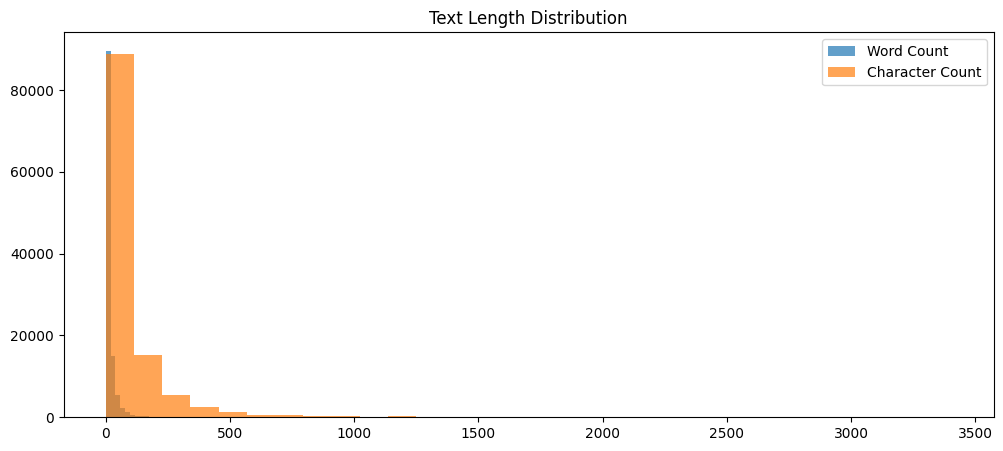

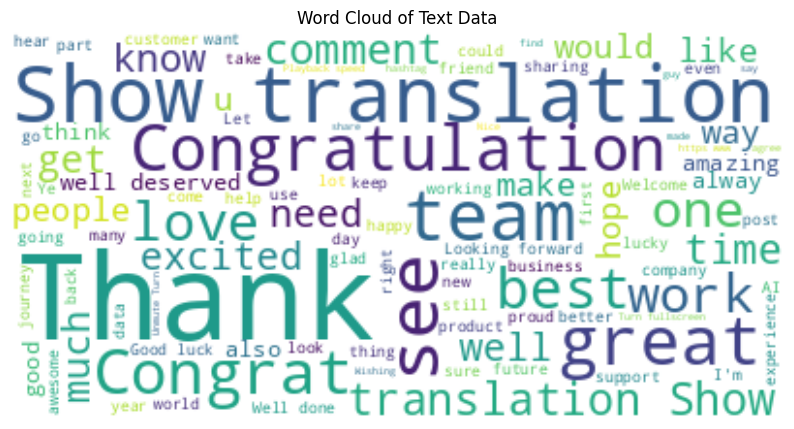

In [ ]:
# EDA: Analyze the text column
def eda_text_column(df, column_name):
    print(f"Total rows: {len(df)}")
    print(f"Missing values: {df[column_name].isnull().sum()}")
    print(f"Duplicate entries: {df[column_name].duplicated().sum()}")
    print(f"Unique entries: {df[column_name].nunique()}")

    # Text length distributions
    df['text_length'] = df[column_name].str.len()
    df['word_count'] = df[column_name].str.split().apply(len)

    # Plot length distributions
    plt.figure(figsize=(12, 5))
    plt.hist(df['word_count'].dropna(), bins=30, alpha=0.7, label='Word Count')
    plt.hist(df['text_length'].dropna(), bins=30, alpha=0.7, label='Character Count')
    plt.title('Text Length Distribution')
    plt.legend()
    plt.show()

    # Generate Word Cloud
    all_text = " ".join(df[column_name].dropna())
    wordcloud = WordCloud(stopwords=stopwords.words('english'), background_color='white').generate(all_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Text Data")
    plt.show()

eda_text_column(comments_df, 'cleaned_comments')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total rows: 115464
Missing values: 0
Duplicate entries: 19113
Unique entries: 96351


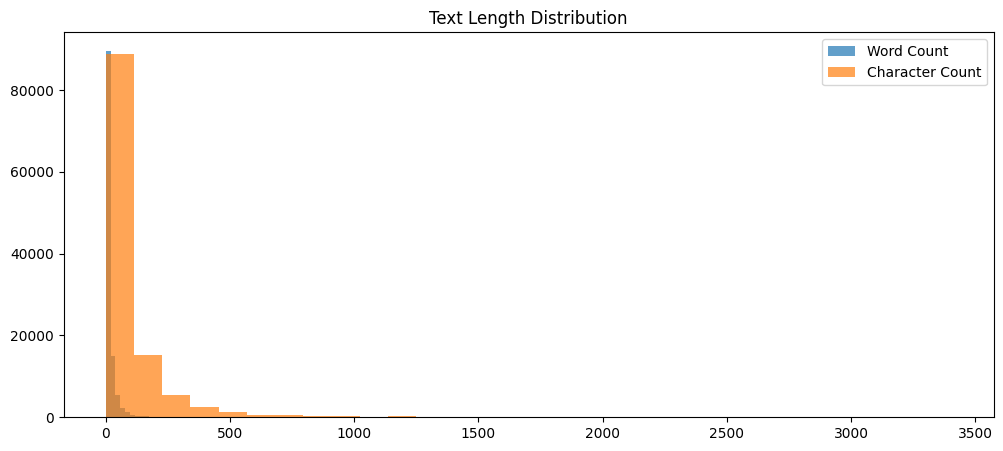

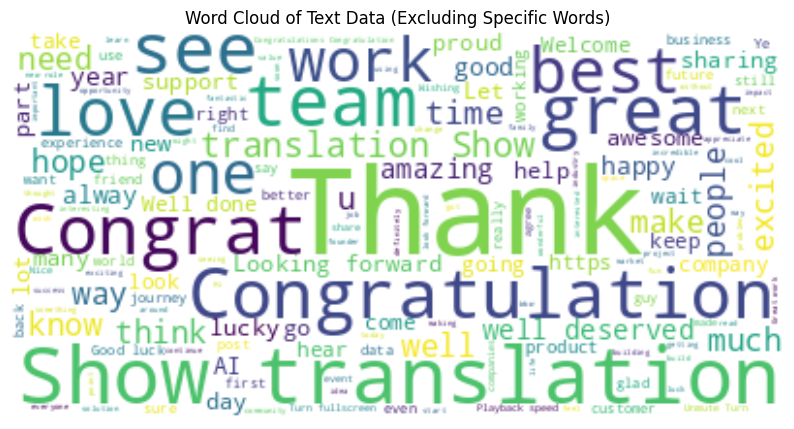

In [ ]:
# EDA: Analyze the text column
# Download stopwords if not already downloaded
nltk.download('stopwords')

def eda_text_column(df, column_name):
    print(f"Total rows: {len(df)}")
    print(f"Missing values: {df[column_name].isnull().sum()}")
    print(f"Duplicate entries: {df[column_name].duplicated().sum()}")
    print(f"Unique entries: {df[column_name].nunique()}")

    # Text length distributions
    df['text_length'] = df[column_name].str.len()
    df['word_count'] = df[column_name].str.split().apply(len)

    # Plot length distributions
    plt.figure(figsize=(12, 5))
    plt.hist(df['word_count'].dropna(), bins=30, alpha=0.7, label='Word Count')
    plt.hist(df['text_length'].dropna(), bins=30, alpha=0.7, label='Character Count')
    plt.title('Text Length Distribution')
    plt.legend()
    plt.show()

    # Generate Word Cloud
    excluded_words = {"hashtag", "comment", "like", "repost", "send", "followers"}
    custom_stopwords = set(stopwords.words('english')) | STOPWORDS | excluded_words

    # Concatenate all text for the word cloud
    all_text = " ".join(df[column_name].dropna())

    # Generate the word cloud with the additional excluded words
    wordcloud = WordCloud(
        stopwords=custom_stopwords,
        background_color='white'
    ).generate(all_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Text Data (Excluding Specific Words)")
    plt.show()

# Assuming `comments_df` is your DataFrame
eda_text_column(comments_df, 'cleaned_comments')


2. Preprocessing for Clustering Steps:
- Tokenization and text cleaning (e.g., removing stopwords, punctuation).
- Vectorization for clustering (e.g., TF-IDF or word embeddings).

In [ ]:
def train_test_split_data(data, test_size=0.3, random_state=42):
    train_data, test_data = train_test_split(data, test_size=test_size, random_state=random_state)

    # Verify the result
    print(f"Number of rows in training data: {len(train_data)}")
    print(f"Number of rows in test data: {len(test_data)}")

    return train_data, test_data

Preprocessing: Tokenization and Text Cleaning

In [ ]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(df, column_name):
    stop_words = set(stopwords.words('english'))

    # Tokenization and Cleaning
    df['cleaned_text'] = df[column_name].dropna().apply(
        lambda x: " ".join([word for word in word_tokenize(x.lower())
                            if word.isalpha() and word not in stop_words])
    )
    return df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vectorization for Clustering: TF-IDF

In [ ]:
def vectorize_text(df, column_name):
    vectorizer = TfidfVectorizer(max_features=1000)  # Adjust features as needed
    X = vectorizer.fit_transform(df[column_name].dropna())
    return X, vectorizer


In [ ]:
#train_data, test_data = train_test_split_data(data, test_size=0.3, random_state=42)

In [ ]:
train_feature_data = preprocess_text(train_feature_data, 'cleaned_comments')

In [ ]:
train_data = preprocess_text(train_data, 'cleaned_comments')

In [ ]:
test_data = preprocess_text(test_data, 'cleaned_comments')


In [ ]:
personality_train_data = preprocess_text(personality_train_data, 'cleaned_comments')
personality_test_data = preprocess_text(personality_test_data, 'cleaned_comments')
#personality_train_model_data = preprocess_text(personality_train_model_data, 'cleaned_comments')

In [ ]:
test_data

,Unnamed: 0,username,cleaned_comments,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text
0,17116,joseph-chen-cmrp-691bb510,Congratulations!!!!👏,0,0,0,congratulations
1,17116,joseph-chen-cmrp-691bb510,Catherine Chen “CC” You have an amazing produc...,0,0,0,catherine chen cc amazing product customers ob...
2,17116,joseph-chen-cmrp-691bb510,Excited to attend this season and the show!,0,0,0,excited attend season show
4,17116,joseph-chen-cmrp-691bb510,Very excited for you!!! Congratulations 🎉,0,0,0,excited congratulations
5,17116,joseph-chen-cmrp-691bb510,A very exciting event! Can’t wait.,0,0,0,exciting event wait
...,...,...,...,...,...,...,...
44296,19323,nicholasshevelyov,Nick Shevelyov you haven't aged a day!,0,1,1,nick shevelyov aged day
44297,19323,nicholasshevelyov,Greg Martin very kind of you. Still trying to ...,0,1,1,greg martin kind still trying dress well yet c...
44298,19323,nicholasshevelyov,Thanks Nick Shevelyov for inviting me to parti...,0,1,1,thanks nick shevelyov inviting participate aug...
44299,19323,nicholasshevelyov,Richard Seiersen I like the sound of security ...,0,1,1,richard seiersen like sound security super her...


For the vectorization we have to train the vectorization on the train data and apply it to the test data

In [ ]:
train_feature_data = train_feature_data[train_feature_data['cleaned_text'].notna()]

In [ ]:
train_data = train_data[train_data['cleaned_text'].notna()]
X_train, vectorizer = vectorize_text(train_data, 'cleaned_text')


In [ ]:
X_test = vectorizer.transform(test_data['cleaned_text'].dropna())

In [ ]:
test_data = test_data[test_data['cleaned_text'].notna()]


In [ ]:
X_test

<34597x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 180189 stored elements in Compressed Sparse Row format>

In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Master Thesis/Data_text_variables/all_variables.pkl


3. Clustering Approaches:
- K-means with vectorized data.
- Hierarchical clustering.
- Topic modeling with Latent Dirichlet Allocation (LDA).

Split data in train and test split. Usually in supervised learing a train test split is uncommon, but in this case it is important, because we want to make sure that the clusters are applicable to previously unseen data

Step 3: Clustering with K-Means

In [ ]:
def cluster_text(X_train, X_test, n_clusters=5):
    # Step 2: Train the KMeans model on the training dataset
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train)  # Train the model on the training data

    # Step 3: Predict the clusters on the test dataset
    train_clusters = kmeans.predict(X_train)  # Predict on the training data
    test_clusters = kmeans.predict(X_test)  # Predict on the test data

    # Step 4: Evaluate clustering on the test dataset using Silhouette Score
    score = silhouette_score(X_test, test_clusters)
    print(f"Silhouette Score on test data for {n_clusters} clusters: {score}")

    # Step 5: Return both the test clusters and the trained KMeans model
    return test_clusters, train_clusters, kmeans  # Ensure you return these values


Step 3.1: Visualize Clusters

In [ ]:
def visualize_clusters(X, clusters):
    # Convert sparse matrix to dense if necessary
    if hasattr(X, "toarray"):
        X = X.toarray()

    # Reduce dimensions for visualization
    pca = PCA(n_components=2)
    reduced_X = pca.fit_transform(X)

    # Plot the clusters
    plt.figure(figsize=(10, 7))
    plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.title("PCA Visualization of Clusters")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(label="Cluster")
    plt.show()


Step 4: Assign Topics to Clusters

In [ ]:
def assign_topic_labels(df, clusters, vectorizer, n_top_words=10):
    feature_names = vectorizer.get_feature_names_out()
    df['comments_cluster_Kmeans_initial_model'] = clusters

    # Get top words for each cluster
    topic_labels = {}
    for cluster in set(clusters):
        # Combine all text in the cluster
        cluster_texts = " ".join(df[df['comments_cluster_Kmeans_initial_model'] == cluster]['cleaned_text'])
        # Count term frequencies
        cluster_vector = Counter(word_tokenize(cluster_texts))
        top_words = cluster_vector.most_common(n_top_words)
        topic_labels[cluster] = [word for word, _ in top_words]

    # Display topics
    print("Cluster Topics:")
    for cluster, words in topic_labels.items():
        print(f"Cluster {cluster}: {', '.join(words)}")

    return topic_labels


1. Perform Clusting:

Silhouette Score on test data for 5 clusters: 0.06476158922585172


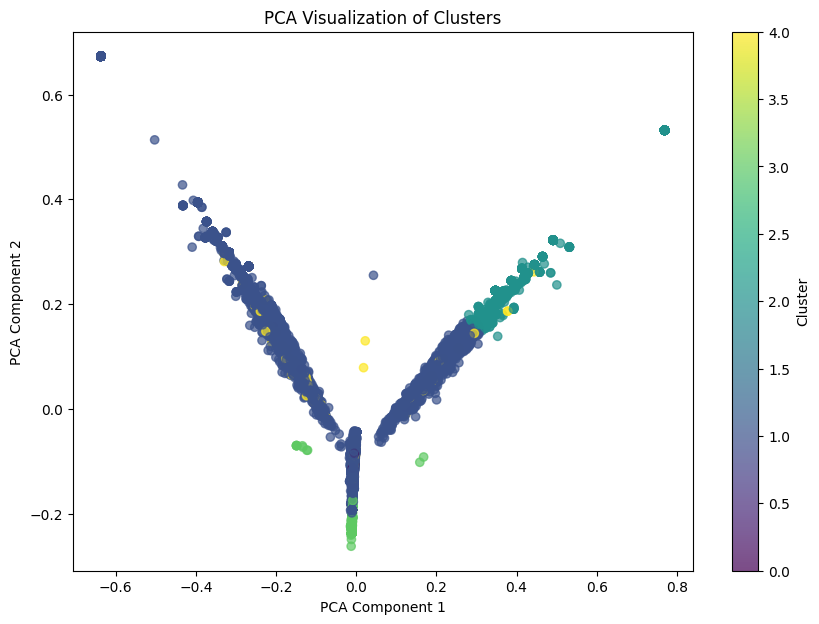

In [ ]:
test_clusters, train_clusters, kmeans_model = cluster_text(X_train, X_test, n_clusters=5)
visualize_clusters(X_test, test_clusters)


2. Assign Topics:

Comparing the labeling of the clusters for test and training data

In [ ]:
topic_labels = assign_topic_labels(test_data, test_clusters, vectorizer)

Cluster Topics:
Cluster 0: kind, words, thank, thanks, much, appreciate, well, team, hope, like
Cluster 1: congrats, great, thanks, team, thank, well, see, work, congratulations, love
Cluster 2: congratulations, well, deserved, team, best, great, awesome, amazing, lucky, news
Cluster 3: show, translation, comment, de, parabéns, gracias, que, félicitations, merci, un
Cluster 4: one, great, like, time, good, best, would, people, work, see


In [ ]:
topic_labels = assign_topic_labels(train_data, train_clusters, vectorizer)

Cluster Topics:
Cluster 0: kind, words, thank, thanks, appreciate, much, great, support, work, hope
Cluster 1: congrats, great, thanks, team, thank, well, see, work, congratulations, love
Cluster 2: congratulations, well, deserved, team, great, best, amazing, awesome, lucky, news
Cluster 3: show, translation, comment, de, que, gracias, felicidades, parabéns, félicitations, un
Cluster 4: one, great, best, time, like, people, good, would, work, see


### Topic Analysis
Cluster 0: Gratitude and Appreciation
Keywords: kind, words, thank, thanks, much, appreciate, well, team, hope, like
Interpretation: This cluster emphasizes expressions of gratitude and appreciation. It likely represents messages where individuals thank others for their efforts, support, or contributions, often fostering a positive and encouraging tone.

Cluster 1: Celebratory Acknowledgements
Keywords: congrats, great, thanks, team, thank, well, see, work, congratulations, love
Interpretation: This cluster focuses on congratulatory messages, particularly for teamwork and achievements. The recurring presence of "team" and "work" suggests a professional context where accomplishments are being recognized and celebrated.

Cluster 2: Enthusiastic Congratulations
Keywords: congratulations, well, deserved, team, best, great, awesome, amazing, lucky, news
Interpretation: This cluster reflects enthusiasm in congratulating individuals or teams. Words like "deserved," "awesome," and "amazing" highlight admiration and positive reinforcement for achievements or good news.

Cluster 3: Multilingual Congratulations and Comments
Keywords: show, translation, comment, de, parabéns, gracias, que, félicitations, merci, un
Interpretation: This cluster is distinct in its multilingual focus, with words in various languages like Portuguese ("parabéns"), Spanish ("gracias"), and French ("félicitations"). It represents congratulatory or appreciative messages across different cultural and linguistic contexts.

Cluster 4: General Positive Sentiments
Keywords: one, great, like, time, good, best, would, people, work, see
Interpretation: This cluster expresses general positive sentiments, discussing experiences, teamwork, and social interactions. Words like "great," "time," and "good" suggest a mix of professional and casual contexts, focusing on optimism and shared experiences.

Summary of Themes

Gratitude and Appreciation: Clusters 0 and 1 highlight thankfulness and acknowledgment, particularly within teams.
Congratulatory Messages: Clusters 1, 2, and 3 focus on celebrating achievements, with Cluster 3 adding a multilingual perspective.
Positive Social Sentiments: Cluster 4 reflects general positivity, emphasizing teamwork, good times, and interpersonal interactions.

Parameters: {'max_iter': 300, 'n_clusters': 2, 'n_init': 15}, Silhouette Score: 0.04415524151575274
Parameters: {'max_iter': 300, 'n_clusters': 3, 'n_init': 15}, Silhouette Score: 0.06772850492972152
Parameters: {'max_iter': 300, 'n_clusters': 4, 'n_init': 15}, Silhouette Score: 0.08931426449744125
Parameters: {'max_iter': 300, 'n_clusters': 5, 'n_init': 15}, Silhouette Score: 0.09050816551832769
Parameters: {'max_iter': 300, 'n_clusters': 6, 'n_init': 15}, Silhouette Score: 0.09611843568974278
Parameters: {'max_iter': 300, 'n_clusters': 7, 'n_init': 15}, Silhouette Score: 0.09696931293345226
Parameters: {'max_iter': 300, 'n_clusters': 8, 'n_init': 15}, Silhouette Score: 0.10331419997221725
Parameters: {'max_iter': 300, 'n_clusters': 9, 'n_init': 15}, Silhouette Score: 0.09853297152248981
Parameters: {'max_iter': 300, 'n_clusters': 10, 'n_init': 15}, Silhouette Score: 0.10759427708015978
Parameters: {'max_iter': 300, 'n_clusters': 11, 'n_init': 15}, Silhouette Score: 0.1135312324592030

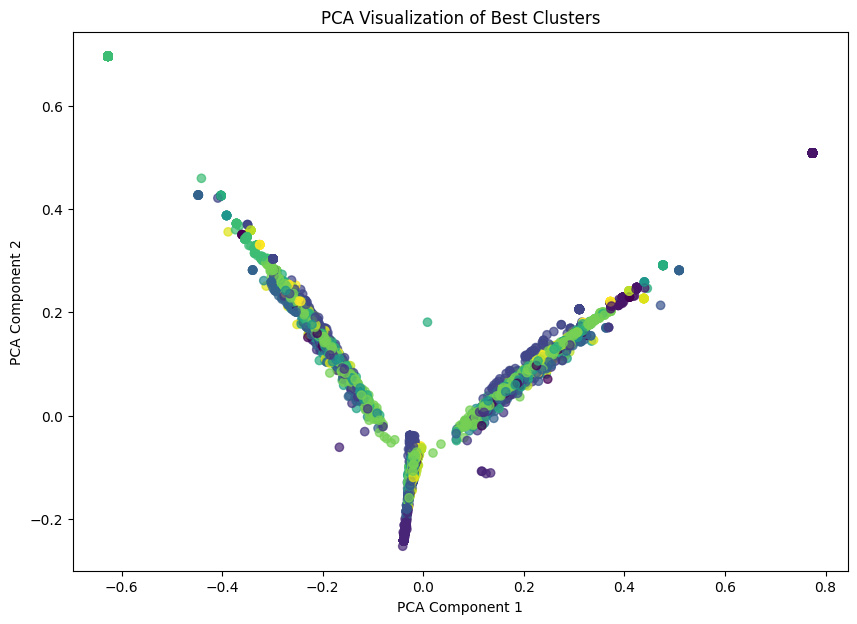

clusters on previously unseen data to prevent overfitting on the test data:
Silhouette Score for Test Clusters: 0.12624065393104872


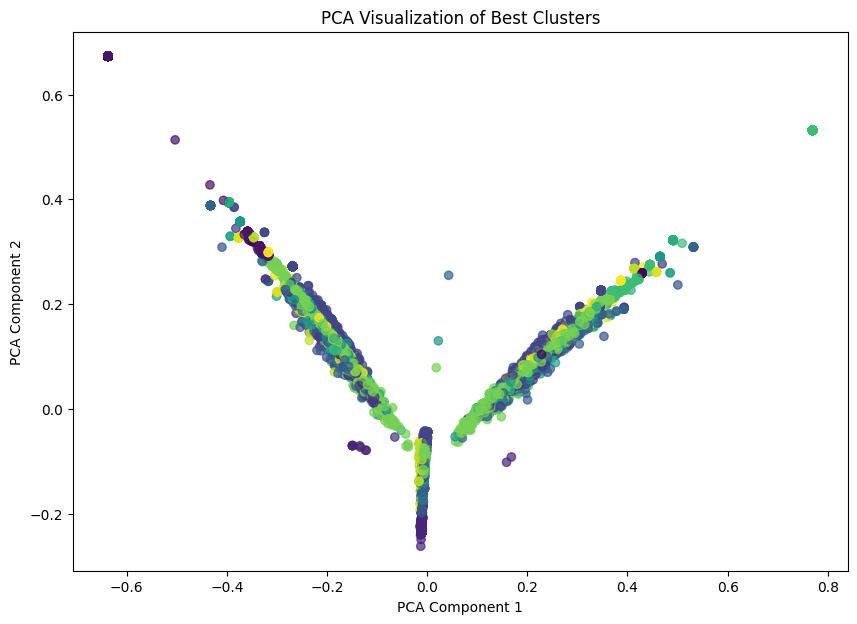

Cluster Topics:
Cluster 0: excited, team, see, congrats, next, congratulations, welcome, work, great, thanks
Cluster 1: congrats, amazing, happy, exciting, proud, heather, kyle, yay, michelle, kelly
Cluster 2: show, translation, comment, de, que, gracias, felicidades, parabéns, félicitations, un
Cluster 3: see, great, wait, congrats, congratulations, love, good, ca, next, work
Cluster 4: well, deserved, congratulations, congrats, done, team, amazing, great, work, recognition
Cluster 5: thanks, sharing, much, support, great, appreciate, us, lot, kind, really
Cluster 6: great, work, congrats, congratulations, thanks, news, job, thank, event, time
Cluster 7: turn, playback, speed, unmute, fullscreen, comments, captions, closed, reposts, repost
Cluster 8: totally, agree, sean, almost, like, internal, cross, functional, enablement, member
Cluster 9: forward, looking, look, seeing, great, next, working, team, congrats, thanks
Cluster 10: best, luck, new, congrats, congratulations, good, wish

In [ ]:
# prompt: give me a code to improve the hyperparameters to reach the best possible silhuette score on the respective kvold holdouts
C_train, C_test = train_test_split(X_train, test_size=0.2, random_state=42)  # Adjust test size as needed

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], # Number of Clusters
    'max_iter': [300], # Maximum Iterations
    'n_init': [15]   # Number of initializations
}

best_score = -1
best_params = {}
best_kmeans_model = None

# Iterate through all combinations of parameters
for params in ParameterGrid(param_grid):
    kmeans = KMeans(**params, random_state=42)  # Create a KMeans model with the current parameters
    kmeans.fit(C_train)

    train_clusters = kmeans.predict(C_train)
    c_test_clusters = kmeans.predict(C_test)
    score = silhouette_score(C_test, c_test_clusters)

    print(f"Parameters: {params}, Silhouette Score: {score}")

    if score > best_score:
        best_score = score
        best_params = params
        best_kmeans_model = kmeans

print(f"\nBest Parameters: {best_params}, Best Silhouette Score: {best_score}")

# Visualize best clusters
def visualize_clusters(X, clusters):
    pca = PCA(n_components=2)
    reduced_X = pca.fit_transform(X.toarray())
    plt.figure(figsize=(10, 7))
    plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.title("PCA Visualization of Best Clusters")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

visualize_clusters(C_test, best_kmeans_model.predict(C_test))


def assign_topic_labels(df, clusters, vectorizer, n_top_words=10):
    feature_names = vectorizer.get_feature_names_out()
    df['comments_grid_optimized_k-means_cluster'] = clusters
    topic_labels = {}
    for cluster in set(clusters):
        cluster_texts = " ".join(df[df['comments_grid_optimized_k-means_cluster'] == cluster]['cleaned_text'])
        cluster_vector = Counter(word_tokenize(cluster_texts))
        top_words = cluster_vector.most_common(n_top_words)
        topic_labels[cluster] = [word for word, _ in top_words]
    print("Cluster Topics:")
    for cluster, words in topic_labels.items():
        print(f"Cluster {cluster}: {', '.join(words)}")
    return topic_labels


# Assign topics using the best model
c_train_clusters = best_kmeans_model.predict(C_train)
c_test_clusters = best_kmeans_model.predict(C_test)
test_clusters = best_kmeans_model.predict(X_test)
train_clusters = best_kmeans_model.predict(X_train)

print("clusters on previously unseen data to prevent overfitting on the test data:")
score = silhouette_score(X_test, test_clusters)
print(f"Silhouette Score for Test Clusters: {score}")
# Visualize test clusters
visualize_clusters(X_test, test_clusters)

topic_labels = assign_topic_labels(train_data, train_clusters, vectorizer)
topic_labels = assign_topic_labels(test_data, test_clusters, vectorizer)

## Hierarchical Clustering
### Normalization
KMeans does not use a distance matrix explicitly but rather computes distances dynamically during the clustering process (e.g., using Euclidean distance). However, normalization or standardization is still important for KMeans.

Since hierarchical clustering uses distances, it's essential to normalize or standardize the data (e.g., using MinMaxScaler or StandardScaler).

Unfortunately we can not use hierarchical clustering on this probelm, because it does not allow us to cluster previously unseen data. The goal of our models final model is, that we can also apply it to new data. Features created by hierarchical clustering don't allow this because hierarchical clustering requires a linkage matrix.


Additional Notes
Clustering Methods: Common linkage methods include:

ward: Minimizes the variance within clusters.
single: Uses the minimum distance between points.
complete: Uses the maximum distance between points.
average: Uses the average distance between points.
Choose the method based on the structure of your data.

When to Use Distance Threshold:

If you want to dynamically determine clusters based on a similarity threshold, use distance_threshold.
Let me know if you'd like to execute or modify any of these steps!


Topic modeling with Latent Dirichlet Allocation (LDA).

TF-IDF vectorizer work best if the tokens are joined together to one string. This is not true for LDA. Here it is better to keep the different tokens in a list.

Preprocessing: Tokenization and Text Cleaning as a list of tokens

In [ ]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(df, column_name):
    stop_words = set(stopwords.words('english'))

    # Tokenization and Cleaning
    df['tokens'] = df[column_name].dropna().apply(
        lambda x: [word for word in word_tokenize(x.lower())
                   if word.isalpha() and word not in stop_words]
    )
    return df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_data = preprocess_text(train_data, 'cleaned_comments')

In [ ]:
test_data = preprocess_text(test_data, 'cleaned_comments')

In [ ]:
test_data

,Unnamed: 0,username,cleaned_comments,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,comments_cluster_Kmeans_initial_model,comments_grid_optimized_k-means_cluster,tokens
0,17116,joseph-chen-cmrp-691bb510,Congratulations!!!!👏,0,0,0,congratulations,2,13,[congratulations]
1,17116,joseph-chen-cmrp-691bb510,Catherine Chen “CC” You have an amazing produc...,0,0,0,catherine chen cc amazing product customers ob...,1,15,"[catherine, chen, cc, amazing, product, custom..."
2,17116,joseph-chen-cmrp-691bb510,Excited to attend this season and the show!,0,0,0,excited attend season show,1,0,"[excited, attend, season, show]"
4,17116,joseph-chen-cmrp-691bb510,Very excited for you!!! Congratulations 🎉,0,0,0,excited congratulations,2,0,"[excited, congratulations]"
5,17116,joseph-chen-cmrp-691bb510,A very exciting event! Can’t wait.,0,0,0,exciting event wait,1,15,"[exciting, event, wait]"
...,...,...,...,...,...,...,...,...,...,...
44296,19323,nicholasshevelyov,Nick Shevelyov you haven't aged a day!,0,1,1,nick shevelyov aged day,1,15,"[nick, shevelyov, aged, day]"
44297,19323,nicholasshevelyov,Greg Martin very kind of you. Still trying to ...,0,1,1,greg martin kind still trying dress well yet c...,0,15,"[greg, martin, kind, still, trying, dress, wel..."
44298,19323,nicholasshevelyov,Thanks Nick Shevelyov for inviting me to parti...,0,1,1,thanks nick shevelyov inviting participate aug...,1,15,"[thanks, nick, shevelyov, inviting, participat..."
44299,19323,nicholasshevelyov,Richard Seiersen I like the sound of security ...,0,1,1,richard seiersen like sound security super her...,1,15,"[richard, seiersen, like, sound, security, sup..."


Vectorization for Clustering: TfidfVectorizer

In [ ]:
# Step 1: Create a Dictionary from the train data (only use train data for dictionary creation)
train_tokens = train_data['tokens'].tolist()
dictionary = corpora.Dictionary(train_tokens)  # Use train data only for the dictionary

# Step 2: Create a Bag-of-Words (BoW) representation of the training documents
train_corpus = [dictionary.doc2bow(tokens) for tokens in train_tokens]

# Step 3: Apply LDA to the training corpus (train data only)
lda_model = gensim.models.LdaMulticore(train_corpus, num_topics=5, id2word=dictionary, passes=10)

# Step 4: Print the topics discovered by LDA
print("Topics discovered by LDA:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic #{idx}: {topic}")

# Step 5: Vectorize the test data using the same dictionary
test_tokens = test_data['tokens'].tolist()
test_corpus = [dictionary.doc2bow(tokens) for tokens in test_tokens]

# Step 6: Get the topic distribution for each document in the test corpus
test_topic_distribution = [lda_model.get_document_topics(doc) for doc in test_corpus]

# Optionally, you can assign the most likely topic to each document
test_data['comments_LDA_assigned_topic'] = [max(dist, key=lambda x: x[1])[0] for dist in test_topic_distribution]

# Step 7: Output the topics for the test data
print("\nTest Data with Assigned Topics:")
print(test_data[['tokens', 'comments_LDA_assigned_topic']].head())

# Step 8: Get the topic distribution for each document in the train corpus
train_topic_distribution = [lda_model.get_document_topics(doc) for doc in train_corpus]

# Step 9: Assign the most likely topic to each document in the train data
train_data['comments_LDA_assigned_topic'] = [max(dist, key=lambda x: x[1])[0] for dist in train_topic_distribution]

# Step 10: Output the topics for the train data
print("\nTrain Data with Assigned Topics:")
print(train_data[['tokens', 'comments_LDA_assigned_topic']].head())

Topics discovered by LDA:
Topic #0: 0.027*"best" + 0.014*"luck" + 0.011*"turn" + 0.011*"good" + 0.009*"one" + 0.009*"comments" + 0.008*"great" + 0.008*"speed" + 0.007*"fullscreen" + 0.007*"unmute"
Topic #1: 0.022*"show" + 0.021*"translation" + 0.011*"comment" + 0.005*"ai" + 0.005*"like" + 0.005*"would" + 0.004*"one" + 0.004*"think" + 0.004*"time" + 0.004*"people"
Topic #2: 0.069*"congrats" + 0.029*"team" + 0.020*"great" + 0.020*"thank" + 0.014*"well" + 0.013*"amazing" + 0.013*"excited" + 0.009*"work" + 0.009*"thanks" + 0.008*"see"
Topic #3: 0.027*"thanks" + 0.023*"love" + 0.010*"good" + 0.010*"much" + 0.009*"thank" + 0.007*"looking" + 0.007*"forward" + 0.006*"great" + 0.006*"would" + 0.006*"sharing"
Topic #4: 0.077*"congratulations" + 0.031*"great" + 0.014*"well" + 0.011*"work" + 0.010*"see" + 0.007*"deserved" + 0.006*"like" + 0.006*"new" + 0.006*"thanks" + 0.006*"nice"

Test Data with Assigned Topics:
                                              tokens  \
0                           

### Topic Analysis
Topic #0: Encouragement and Best Wishes
Keywords: best, luck, turn, good, one, comments, great, speed, fullscreen, unmute
Interpretation: This topic revolves around offering best wishes and encouragement. Words like "best," "luck," and "good" indicate positive reinforcement, likely in professional or personal contexts. Terms like "fullscreen" and "unmute" suggest occasional references to media or presentations, possibly in interactive settings.

Topic #1: Translation and Discussions
Keywords: show, translation, comment, ai, like, would, one, think, time, people
Interpretation: This topic focuses on translation, discussions, and audience engagement. Words like "translation," "comment," and "show" suggest multilingual content or feedback. Mentions of "ai" and "think" point to potential discussions around technology and opinions.

Topic #2: Team Celebrations and Enthusiasm
Keywords: congrats, team, great, thank, well, amazing, excited, work, thanks, see
Interpretation: This topic highlights team celebrations and expressions of enthusiasm. Words like "congrats," "team," "great," and "amazing" reflect recognition of achievements and positive energy within collaborative efforts.

Topic #3: Gratitude and Looking Forward
Keywords: thanks, love, good, much, thank, looking, forward, great, would, sharing
Interpretation: This topic centers on gratitude and optimism. Words like "thanks," "love," and "looking forward" suggest appreciation for support and anticipation for future endeavors or shared experiences.

Topic #4: Congratulations and Recognition
Keywords: congratulations, great, well, work, see, deserved, like, new, thanks, nice
Interpretation: This topic focuses on congratulating and recognizing achievements. Words like "congratulations," "great," and "deserved" emphasize acknowledgment of success and appreciation for quality work.

Summary of Themes

Encouragement and Support: Topics #0 and #3 emphasize best wishes, gratitude, and optimism for future endeavors.
Team and Achievements: Topics #2 and #4 focus on celebrating success, team contributions, and individual recognition.
Discussions and Multilingual Content: Topic #1 highlights engagement through translation, feedback, and conversations around technology.

In [ ]:
test_data

,Unnamed: 0,username,cleaned_comments,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,comments_cluster_Kmeans_initial_model,comments_grid_optimized_k-means_cluster,tokens,comments_LDA_assigned_topic
0,17116,joseph-chen-cmrp-691bb510,Congratulations!!!!👏,0,0,0,congratulations,2,13,[congratulations],4
1,17116,joseph-chen-cmrp-691bb510,Catherine Chen “CC” You have an amazing produc...,0,0,0,catherine chen cc amazing product customers ob...,1,15,"[catherine, chen, cc, amazing, product, custom...",2
2,17116,joseph-chen-cmrp-691bb510,Excited to attend this season and the show!,0,0,0,excited attend season show,1,0,"[excited, attend, season, show]",3
4,17116,joseph-chen-cmrp-691bb510,Very excited for you!!! Congratulations 🎉,0,0,0,excited congratulations,2,0,"[excited, congratulations]",4
5,17116,joseph-chen-cmrp-691bb510,A very exciting event! Can’t wait.,0,0,0,exciting event wait,1,15,"[exciting, event, wait]",2
...,...,...,...,...,...,...,...,...,...,...,...
44296,19323,nicholasshevelyov,Nick Shevelyov you haven't aged a day!,0,1,1,nick shevelyov aged day,1,15,"[nick, shevelyov, aged, day]",0
44297,19323,nicholasshevelyov,Greg Martin very kind of you. Still trying to ...,0,1,1,greg martin kind still trying dress well yet c...,0,15,"[greg, martin, kind, still, trying, dress, wel...",4
44298,19323,nicholasshevelyov,Thanks Nick Shevelyov for inviting me to parti...,0,1,1,thanks nick shevelyov inviting participate aug...,1,15,"[thanks, nick, shevelyov, inviting, participat...",3
44299,19323,nicholasshevelyov,Richard Seiersen I like the sound of security ...,0,1,1,richard seiersen like sound security super her...,1,15,"[richard, seiersen, like, sound, security, sup...",4


In [ ]:
test_data.columns

Index(['Unnamed: 0', 'username', 'cleaned_comments', 'Success_after_5_years',
       'equity_rounds_raised_after_5_years', 'Success_until_now',
       'cleaned_text', 'comments_cluster_Kmeans_initial_model',
       'comments_grid_optimized_k-means_cluster', 'tokens',
       'comments_LDA_assigned_topic'],
      dtype='object')

<ipython-input-44-06f4cefdfdce>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['cleaned_text1'] = test_data['cleaned_comments'].apply(preprocess_text)
<ipython-input-44-06f4cefdfdce>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['comments_cluster_Bert_Kmeans'] = kmeans.predict(test_embeddings)


Silhouette Score for Test Data: 0.026674728840589523
Train Data with Clusters:
                                       cleaned_text1  \
0  congrats and i know youre going to kick butt i...   
1  im just assuming that most are using generativ...   
2  i agree but i also think that abstraction and ...   
3                                      so the basics   
4  ah nuts i usually stop by to check out your sh...   

   comments_cluster_Bert_Kmeans  
0                             2  
1                             1  
2                             1  
3                             4  
4                             4  
Test Data with Predicted Clusters:
                                       cleaned_text1  \
0                                    congratulations   
1  catherine chen cc you have an amazing product ...   
2         excited to attend this season and the show   
3              very excited for you congratulations    
4                    a very exciting event cant wait   

   comme

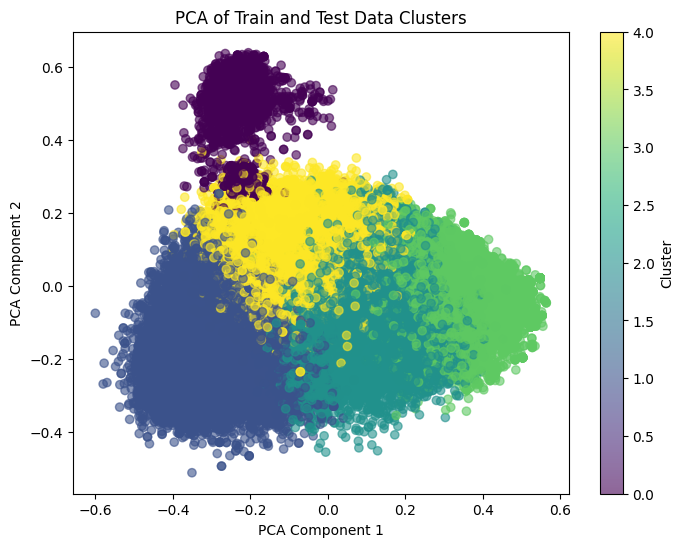

In [ ]:
# Function to clean and preprocess the text data (optional)
def preprocess_text(text):
    # Basic text preprocessing (optional)
    text = text.lower()
    text = ''.join(e for e in text if e.isalnum() or e.isspace())
    return text

# Step 1: Preprocess the train and test data
train_data['cleaned_text1'] = train_data['cleaned_comments'].apply(preprocess_text)
test_data['cleaned_text1'] = test_data['cleaned_comments'].apply(preprocess_text)
train_feature_data['cleaned_text1'] = train_feature_data['cleaned_comments'].apply(preprocess_text)
personality_train_data['cleaned_text1'] = personality_train_data['cleaned_comments'].apply(preprocess_text)
personality_test_data['cleaned_text1'] = personality_test_data['cleaned_comments'].apply(preprocess_text)
#personality_train_model_data['cleaned_text1'] = personality_train_model_data['cleaned_comments'].apply(preprocess_text)

# Step 2: Load a pre-trained SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')  # A lightweight model for embeddings

# Step 3: Generate embeddings for train and test data
train_embeddings = model.encode(train_data['cleaned_text1'].tolist(), convert_to_numpy=True)
test_embeddings = model.encode(test_data['cleaned_text1'].tolist(), convert_to_numpy=True)
train_feature_embeddings = model.encode(train_feature_data['cleaned_text1'].tolist(), convert_to_numpy=True)
personality_train_embeddings = model.encode(personality_train_data['cleaned_text1'].tolist(), convert_to_numpy=True)
personality_test_embeddings = model.encode(personality_test_data['cleaned_text1'].tolist(), convert_to_numpy=True)
#personality_train_model_embeddings = model.encode(personality_train_model_data['cleaned_text1'].tolist(), convert_to_numpy=True)


# Step 4: Apply K-Means clustering on train data
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
train_data['comments_cluster_Bert_Kmeans'] = kmeans.fit_predict(train_embeddings)

# Step 5: Predict the clusters for test data
test_data['comments_cluster_Bert_Kmeans'] = kmeans.predict(test_embeddings)

# Step 6: Compute Silhouette score for test data
sil_score = silhouette_score(test_embeddings, test_data['comments_cluster_Bert_Kmeans'])
print(f"Silhouette Score for Test Data: {sil_score}")

# Step 7: Output the clustered data
print("Train Data with Clusters:")
print(train_data[['cleaned_text1', 'comments_cluster_Bert_Kmeans']].head())

print("Test Data with Predicted Clusters:")
print(test_data[['cleaned_text1', 'comments_cluster_Bert_Kmeans']].head())

# Optionally, save the output to CSV files
train_data[['cleaned_text1', 'comments_cluster_Bert_Kmeans']].to_csv('clustered_train_data.csv', index=False)
test_data[['cleaned_text1', 'comments_cluster_Bert_Kmeans']].to_csv('clustered_test_data.csv', index=False)

# Step 8: PCA Visualization of the clusters
# Combine train and test embeddings for PCA visualization
combined_embeddings = np.concatenate([train_embeddings, test_embeddings])
combined_labels = np.concatenate([train_data['comments_cluster_Bert_Kmeans'], test_data['comments_cluster_Bert_Kmeans']])

# Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(combined_embeddings)

# Create a DataFrame for plotting
combined_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
combined_df['Cluster'] = combined_labels

# Plot the PCA components with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['PCA1'], combined_df['PCA2'], c=combined_df['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.title('PCA of Train and Test Data Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


n_clusters: 2, init: k-means++, max_iter: 100, Silhouette Score: 0.04067177698016167
n_clusters: 2, init: k-means++, max_iter: 200, Silhouette Score: 0.04067177698016167
n_clusters: 2, init: k-means++, max_iter: 300, Silhouette Score: 0.04067177698016167
n_clusters: 2, init: random, max_iter: 100, Silhouette Score: 0.04068407043814659
n_clusters: 2, init: random, max_iter: 200, Silhouette Score: 0.040696341544389725
n_clusters: 2, init: random, max_iter: 300, Silhouette Score: 0.04069024696946144
n_clusters: 3, init: k-means++, max_iter: 100, Silhouette Score: 0.027360117062926292
n_clusters: 3, init: k-means++, max_iter: 200, Silhouette Score: 0.027360117062926292
n_clusters: 3, init: k-means++, max_iter: 300, Silhouette Score: 0.027360117062926292
n_clusters: 3, init: random, max_iter: 100, Silhouette Score: 0.017760053277015686
n_clusters: 3, init: random, max_iter: 200, Silhouette Score: 0.017760053277015686
n_clusters: 3, init: random, max_iter: 300, Silhouette Score: 0.0177600532

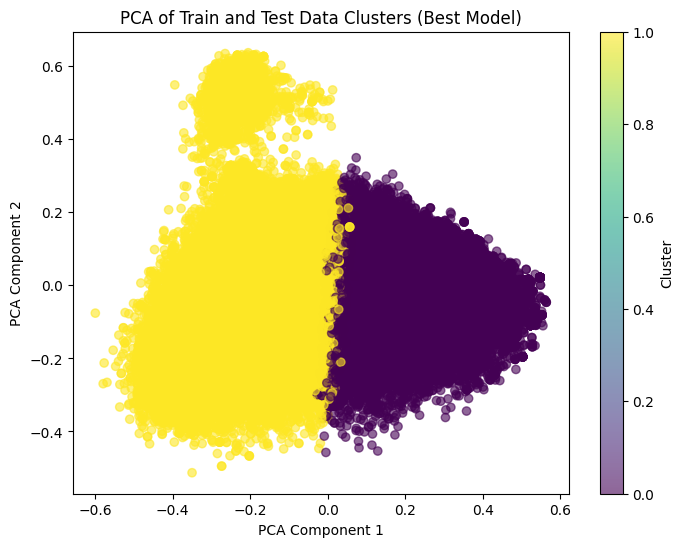

In [ ]:
C_train_embeddings, C_test_embeddings = train_test_split(train_embeddings, test_size=0.2, random_state=42)  # Adjust test size as needed

# Define the search space for hyperparameters
n_clusters_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # Range of number of clusters to try
init_methods = ['k-means++', 'random']  # Different initialization methods for centroids
max_iter_range = [100, 200, 300]  # Different number of iterations for KMeans

# Function to evaluate silhouette score for a set of hyperparameters
def evaluate_kmeans(n_clusters, init, max_iter, C_train_embeddings, C_test_embeddings):
    kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter, random_state=42)
    kmeans.fit(C_train_embeddings)  # Train on the train set
    C_test_clusters = kmeans.predict(C_test_embeddings)  # Predict on the test set

    # Calculate the silhouette score
    sil_score = silhouette_score(C_test_embeddings, C_test_clusters)
    return sil_score, kmeans  # Return both score and the trained model

# Search through the hyperparameter combinations
best_score = -1
best_params = None
best_kmeans = None

for n_clusters in n_clusters_range:
    for init in init_methods:
        for max_iter in max_iter_range:
            # Evaluate for the current hyperparameters
            sil_score, kmeans = evaluate_kmeans(n_clusters, init, max_iter, C_train_embeddings, C_test_embeddings)
            print(f"n_clusters: {n_clusters}, init: {init}, max_iter: {max_iter}, Silhouette Score: {sil_score}")

            # If the current score is better than the best score, update the best parameters
            if sil_score > best_score:
                best_score = sil_score
                best_params = (n_clusters, init, max_iter)
                best_kmeans = kmeans

# Output the best hyperparameters and the corresponding silhouette score
print("\nBest Hyperparameters found:")
print(f"n_clusters: {best_params[0]}, init: {best_params[1]}, max_iter: {best_params[2]}")
print(f"Best Silhouette Score: {best_score}")

# Step 1: Assign the best cluster labels to the train and test data
train_data['comments_K-means_Bert_cluster'] = best_kmeans.predict(train_embeddings)
test_data['comments_K-means_Bert_cluster'] = best_kmeans.predict(test_embeddings)

print("clusters on previously unseen data, even in the hyper parameter optimization process to prevent overfitting on the test data:")
score = silhouette_score(test_embeddings, test_data['comments_K-means_Bert_cluster'])
print(f"Silhouette Score for Test Clusters: {score}")
# Step 2: PCA Visualization of the clusters
# Combine train and test embeddings for PCA visualization
combined_embeddings = np.concatenate([train_embeddings, test_embeddings])
combined_labels = np.concatenate([train_data['comments_K-means_Bert_cluster'], test_data['comments_K-means_Bert_cluster']])

# Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(combined_embeddings)

# Create a DataFrame for plotting
combined_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
combined_df['Cluster'] = combined_labels

# Plot the PCA components with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['PCA1'], combined_df['PCA2'], c=combined_df['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.title('PCA of Train and Test Data Clusters (Best Model)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



BERTopic: can cluster end extract topics out of BERT embedded texts

In [ ]:
test_embeddings

array([[-0.0134265 ,  0.06398357,  0.00740748, ..., -0.00908112,
         0.01529245,  0.0068996 ],
       [-0.13260083, -0.0780504 ,  0.02036526, ..., -0.03323248,
        -0.02387933,  0.06531595],
       [-0.01403689, -0.0710769 ,  0.0268588 , ..., -0.0140628 ,
        -0.04232286, -0.01121088],
       ...,
       [-0.03400631,  0.02901532, -0.0642402 , ..., -0.00207685,
        -0.14842407, -0.03316852],
       [-0.06361808, -0.03410893, -0.0589828 , ...,  0.03828547,
        -0.06570506, -0.02591322],
       [ 0.01002845, -0.01447068,  0.04841616, ..., -0.02914129,
         0.08645678, -0.00632117]], dtype=float32)

In [ ]:
# Step 1: Initialize BERTopic
topic_model = BERTopic(
    language="english",
    calculate_probabilities=True,  # Optional: Calculate probabilities for topic assignments
)

# Step 2: Fit the model using precomputed embeddings and corresponding text
topics, probabilities = topic_model.fit_transform(train_data['cleaned_text1'].tolist(), embeddings=train_embeddings)

# Step 3: Reduce the number of topics to a maximum of 20
# Pass the original documents (train_data['cleaned_text1'].tolist()) to reduce_topics
topic_model.reduce_topics(train_data['cleaned_text1'].tolist(), nr_topics=20)

# Step 4: Add the reduced topic labels to the training data
train_data['comments_K-means_Bertopic_topic'] = topic_model.get_document_info(train_data['cleaned_text1'])['Topic']

# Step 5: Apply the model to the test data
test_topics, _ = topic_model.transform(test_data['cleaned_text1'].tolist(), embeddings=test_embeddings)
test_data['comments_K-means_Bertopic_topic'] = test_topics

# Step 6: Explore the reduced topics
for topic in range(20):  # Assuming a maximum of 20 topics
    print(f"Topic {topic}: {topic_model.get_topic(topic)}")

# Step 7: Visualize the reduced topics
topic_model.visualize_topics()


Topic 0: [('congrats', 0.04584300405167087), ('you', 0.04176814046581411), ('congratulations', 0.04158182465068807), ('to', 0.03282894114678107), ('the', 0.028353253268127748), ('and', 0.026593724991063404), ('great', 0.025757043377587604), ('for', 0.02446893757903293), ('this', 0.02124327287642903), ('your', 0.020888179168364565)]
Topic 1: [('the', 0.036502003291428275), ('to', 0.02913663526836975), ('and', 0.028970213737259498), ('is', 0.027071901079715206), ('of', 0.026383317896944893), ('more', 0.025366329850881948), ('in', 0.0229069670600266), ('ai', 0.022210865090424196), ('that', 0.02162025306893885), ('for', 0.02081715785710314)]
Topic 2: [('linkedin', 0.0418658239454346), ('interested', 0.03272556065998737), ('to', 0.029946332166122313), ('for', 0.028054751236482857), ('the', 0.02766429033645684), ('you', 0.026350403680104075), ('email', 0.02409886725992561), ('me', 0.02351627780069479), ('please', 0.023118731255765104), ('it', 0.021343588070139464)]
Topic 3: [('translation', 

In [ ]:
# Step 1: Define a function to generate a label for each topic
def generate_topic_label(topic_num, top_n_words=5):
    # Get the top n words of the topic
    top_words = topic_model.get_topic(topic_num)

    # If the topic doesn't exist or has no words (i.e., it returns False), return a default label
    if not top_words:  # False, None, or empty list are handled here
        return f"Topic {topic_num} (No words)"

    # Extract the words from the list of tuples
    words = [word for word, _ in top_words[:top_n_words]]

    # Create a label by joining the top words
    label = " ".join(words)

    return label

# Step 2: Generate labels for all topics
topic_labels = {}
for topic_num in range(20):  # Assuming you have 20 topics
    topic_labels[topic_num] = generate_topic_label(topic_num)

# Step 3: Add the labels to the training data
train_data['comments_K-means_Bertopic_topic_label'] = train_data['comments_K-means_Bertopic_topic'].map(topic_labels)

# Step 4: Add the labels to the test data
test_data['comments_K-means_Bertopic_topic_label'] = test_data['comments_K-means_Bertopic_topic'].map(topic_labels)

# Step 5: Print the topic labels for verification
for topic_num, label in topic_labels.items():
    print(f"Topic {topic_num}: {label}")


Topic 0: congrats you congratulations to the
Topic 1: the to and is of
Topic 2: linkedin interested to for the
Topic 3: translation show comment this of
Topic 4: turn fullscreen playback unmute speed
Topic 5: the and to list for
Topic 6: and to that the is
Topic 7: food coffee the to and
Topic 8: the in to that of
Topic 9: the is israel and of
Topic 10: office map in space the
Topic 11: to calendar the time is
Topic 12: breakingnews attorney thornhill wrecking capitolhill
Topic 13: cfbr cfd babu sharath ricardo
Topic 14: spotify tap ecommerce music httpsopenspotifycomshow6yd60lopzrzrs13yfjvsqq
Topic 15: noise headphones louder canceling brightnesscontrast
Topic 16: graphene barrier electrode reduction tunneling
Topic 17: delivery shipped shipping ship over
Topic 18: heroes role models many themselves
Topic 19: Topic 19 (No words)


### Topic Analysis
Topic 0: Congratulations and Celebratory Messages
Keywords: congrats, you, congratulations, to, the
Interpretation: This topic revolves around congratulatory messages and celebrations, likely in personal or professional contexts. It reflects expressions of recognition and acknowledgment of achievements.

Topic 1: Generic Words and Stopwords
Keywords: the, to, and, is, of
Interpretation: This topic consists mainly of stopwords with no significant thematic focus. It may indicate noise or unprocessed text in the dataset.

Topic 2: LinkedIn and Professional Interests
Keywords: linkedin, interested, to, for, the
Interpretation: This topic relates to LinkedIn and professional networking. Words like "interested" suggest discussions around job opportunities, career growth, or professional connections.

Topic 3: Multilingual Content and Comments
Keywords: translation, show, comment, this, of
Interpretation: Focused on translations and comments, this topic suggests multilingual content or discussions about feedback and communication across languages.

Topic 4: Media Playback Controls
Keywords: turn, fullscreen, playback, unmute, speed
Interpretation: This topic is centered around media playback controls, likely reflecting interactions with videos or presentations, including user interface elements.

Topic 5 & Topic 6: General Words and Filler Content
Keywords: (Topic 5: the, and, to, list, for), (Topic 6: and, to, that, the, is)
Interpretation: These topics primarily include generic and filler words, potentially representing noise or unprocessed parts of the dataset.

Topic 7: Food and Coffee
Keywords: food, coffee, the, to, and
Interpretation: This topic reflects conversations or content related to food and coffee, possibly casual discussions or posts about culinary experiences.

Topic 8: Generic Words and Context
Keywords: the, in, to, that, of
Interpretation: Another general and non-specific topic, likely representing common filler words or general content without a clear theme.

Topic 9: Israel and Geopolitical Discussions
Keywords: the, is, israel, and, of
Interpretation: This topic focuses on Israel and likely includes discussions about geopolitics, current events, or cultural topics related to the region.

Topic 10: Office Spaces and Maps
Keywords: office, map, in, space, the
Interpretation: This topic relates to office spaces, maps, or spatial arrangements, suggesting professional or logistical content.

Topic 11: Time Management and Calendars
Keywords: to, calendar, the, time, is
Interpretation: Focused on time management and scheduling, this topic includes discussions about calendars and planning.

Topic 12: Breaking News
Keywords: breakingnews, attorney, thornhill, wrecking, capitolhill
Interpretation: Centered on current events and breaking news, this topic reflects discussions about political or legal matters.

Topic 13: Names and Acronyms
Keywords: cfbr, cfd, babu, sharath, ricardo
Interpretation: This topic includes names and acronyms, possibly representing individuals, organizations, or specific events.

Topic 14: Spotify and Music
Keywords: spotify, tap, ecommerce, music, httpsopenspotifycomshow6yd60lopzrzrs13yfjvsqq
Interpretation: This topic revolves around Spotify and music, suggesting content related to playlists, podcasts, or music sharing.

Topic 15: Noise-Canceling Headphones
Keywords: noise, headphones, louder, canceling, brightnesscontrast
Interpretation: Focused on technology, specifically noise-canceling headphones and sound or brightness adjustments.

Topic 16: Graphene and Advanced Materials
Keywords: graphene, barrier, electrode, reduction, tunneling
Interpretation: This topic is highly technical, focusing on graphene and its applications in materials science or technology.

Topic 17: Shipping and Delivery
Keywords: delivery, shipped, shipping, ship, over
Interpretation: Focused on logistics and delivery, this topic includes discussions about shipping processes and customer experiences.

Topic 18: Role Models and Inspiration
Keywords: heroes, role, models, many, themselves
Interpretation: This topic emphasizes inspiration and admiration for role models or individuals considered heroic.

Topic 19: Undefined
Keywords: (No words)
Interpretation: This topic lacks meaningful content and may indicate unprocessed or empty data.

Summary of Themes

Celebratory and Social Topics: Topics 0 (congratulations), 7 (food and coffee), and 18 (role models) emphasize social and positive content.
Professional and Logistical Topics: Topics 2 (LinkedIn), 10 (office spaces), and 17 (shipping) focus on professional interactions and logistics.
Multilingual and Media Content: Topics 3 (translation) and 4 (media playback) address communication and media interactions.
Technical and Specialized Topics: Topics 14 (Spotify), 15 (headphones), and 16 (graphene) highlight technology and niche interests.
Geopolitical and Current Events: Topics 9 (Israel) and 12 (breaking news) touch on global and political issues.

In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Master Thesis/Data_text_variables/all_variables.pkl


# Sentimental Analysis

Recommendation for Your Use Case (Short Texts/Tweets):
- For quick, rule-based emotion analysis, VADER is a great starting point. It is lightweight, fast, and works well for informal text like tweets.
- For more nuanced emotion classification, consider using a pretrained BERT model for emotion classification (like the j-hartmann/emotion-english-distilroberta-base model on Hugging Face).
- If you want to have more granular emotion detection (beyond just positive or negative sentiment), a pretrained BERT model like GoEmotions is your best bet for classifying tweets into multiple emotions like joy, anger, sadness, etc.


Vader works with raw text, that does not require stop word removal. VADER relies on a lexicon of pre-defined words that are associated with sentiment scores (positive, negative, neutral).
Even stop words like "the," "is," and "in" can be important for VADER's calculations because they affect the tone of the sentence and the context.
For example, the phrase "This is not good" is important in determining sentiment, and removing "is" would leave "This not good," which would change the meaning.

In [ ]:
# Import necessary libraries
# Download the VADER lexicon (required for sentiment analysis)
nltk.download('vader_lexicon')

# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to apply VADER sentiment analysis on text and return sentiment as a dictionary
def get_vader_sentiment(text):
    sentiment = sia.polarity_scores(text)  # Get the sentiment scores
    return sentiment  # Return the full dictionary of sentiment scores

# Apply VADER sentiment analysis row by row for train_data and split the results into four columns
train_data[['comments_vader_sentiment_neg', 'comments_vader_sentiment_neu',
            'comments_vader_sentiment_pos', 'comments_vader_sentiment_compound']] = \
    train_data['cleaned_comments'].apply(lambda x: pd.Series(get_vader_sentiment(x)))

# Apply VADER sentiment analysis row by row for test_data and split the results into four columns
test_data[['comments_vader_sentiment_neg', 'comments_vader_sentiment_neu',
           'comments_vader_sentiment_pos', 'comments_vader_sentiment_compound']] = \
    test_data['cleaned_comments'].apply(lambda x: pd.Series(get_vader_sentiment(x)))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
train_data1 = train_data
test_data1 = test_data

In [ ]:
train_data = train_data1
test_data = test_data1

In [ ]:
train_data

,Unnamed: 0,username,cleaned_comments,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,comments_cluster_Kmeans_initial_model,comments_grid_optimized_k-means_cluster,tokens,comments_LDA_assigned_topic,cleaned_text1,comments_cluster_Bert_Kmeans,comments_K-means_Bert_cluster,comments_K-means_Bertopic_topic,comments_K-means_Bertopic_topic_label,comments_vader_sentiment_neg,comments_vader_sentiment_neu,comments_vader_sentiment_pos,comments_vader_sentiment_compound
0,6356,josh-rickard,Congrats! And I know you’re going to kick butt...,0,0,0,congrats know going kick butt ever need help p...,1,15,"[congrats, know, going, kick, butt, ever, need...",3,congrats and i know youre going to kick butt i...,3,0,2.0,linkedin interested to for the,0.000,0.527,0.473,0.9357
1,6356,josh-rickard,I’m just assuming that most are using generati...,0,0,0,assuming using generative ai augment summariza...,1,15,"[assuming, using, generative, ai, augment, sum...",1,im just assuming that most are using generativ...,2,1,1.0,the to and is of,0.000,0.696,0.304,0.8765
2,6356,josh-rickard,I agree but I also think that abstraction and ...,0,0,0,agree also think abstraction standardization a...,1,15,"[agree, also, think, abstraction, standardizat...",1,i agree but i also think that abstraction and ...,2,1,-1.0,NaN,0.000,0.845,0.155,0.7964
3,6356,josh-rickard,So the basics?,0,0,0,basics,1,15,[basics],1,so the basics,4,1,-1.0,NaN,0.000,1.000,0.000,0.0000
4,6356,josh-rickard,"ah, nuts, i usually stop by to check out your ...",0,0,0,ah nuts usually stop check shoes dude,1,15,"[ah, nuts, usually, stop, check, shoes, dude]",0,ah nuts i usually stop by to check out your sh...,4,1,0.0,congrats you congratulations to the,0.347,0.653,0.000,-0.5848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103208,15795,mung-ki-woo-b9419,Thanks for your participation. Great session,-1,—,-1,thanks participation great session,1,6,"[thanks, participation, great, session]",3,thanks for your participation great session,3,0,NaN,NaN,0.000,0.364,0.636,0.7906
103209,15795,mung-ki-woo-b9419,Un plaisir de t’avoir rencontré!\nShow transla...,-1,—,-1,un plaisir de avoir rencontré show translation...,3,2,"[un, plaisir, de, avoir, rencontré, show, tran...",1,un plaisir de tavoir rencontré\nshow translati...,0,1,NaN,NaN,0.000,1.000,0.000,0.0000
103210,15795,mung-ki-woo-b9419,Kelly Zhang Same here,-1,—,-1,kelly zhang,1,15,"[kelly, zhang]",4,kelly zhang same here,4,1,NaN,NaN,0.000,1.000,0.000,0.0000
103212,15795,mung-ki-woo-b9419,Totally agree,-1,—,-1,totally agree,1,15,"[totally, agree]",1,totally agree,4,1,NaN,NaN,0.000,0.264,0.736,0.4201


Here’s a step-by-step approach for implementing a **BERT** model using Hugging Face's transformers library for emotion classification

In [ ]:
# Load the Emotion Dataset from Hugging Face
dataset = load_dataset('emotion')

# Check the structure of the dataset
print(dataset)


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [ ]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define a function to tokenize the input data
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

# Tokenize the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
# Split dataset into train and test sets
train_data2, test_data2 = tokenized_datasets["train"], tokenized_datasets["test"]

# Convert datasets to PyTorch format (optional but necessary for trainer)
train_data2 = train_data2.with_format("torch", columns=['input_ids', 'attention_mask', 'label'])
test_data2 = test_data2.with_format("torch", columns=['input_ids', 'attention_mask', 'label'])


In [ ]:
# Initialize the BERT model for emotion classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


We use Hugging Face's Trainer API to simplify the training process. We also define training arguments.

In [ ]:
# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',         # output directory
    num_train_epochs=3,             # number of training epochs
    per_device_train_batch_size=8,  # batch size for training
    per_device_eval_batch_size=8,   # batch size for evaluation
    warmup_steps=500,               # number of warmup steps for learning rate scheduler
    weight_decay=0.01,              # strength of weight decay
    logging_dir='./logs',           # directory for storing logs
    logging_steps=10,
)

# Initialize the Trainer
trainer = Trainer(
    model=model,                     # the model to be trained
    args=training_args,              # training arguments
    train_dataset=train_data2,        # training dataset
    eval_dataset=test_data2           # evaluation dataset
)


Train the Model

In [ ]:
# Train the model
trainer.train()


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss
10,1.803600
20,1.815100
30,1.769200
40,1.796300
50,1.694900
60,1.766200
70,1.711100
80,1.626100
90,1.641700
100,1.651800


TrainOutput(global_step=6000, training_loss=0.25626399131740135, metrics={'train_runtime': 1482.4702, 'train_samples_per_second': 32.378, 'train_steps_per_second': 4.047, 'total_flos': 1.2629784231936e+16, 'train_loss': 0.25626399131740135, 'epoch': 3.0})

Evaluate the Model

In [ ]:
# Evaluate the model on the test dataset
results = trainer.evaluate()

# Display results
print(results)


{'eval_loss': 0.22151082754135132, 'eval_runtime': 13.0616, 'eval_samples_per_second': 153.121, 'eval_steps_per_second': 19.14, 'epoch': 3.0}


The low loss of 0,207 is relatively low, indicating that the model is performing well.

In [ ]:
train_data

,Unnamed: 0,username,cleaned_comments,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,comments_cluster_Kmeans_initial_model,comments_grid_optimized_k-means_cluster,tokens,comments_LDA_assigned_topic,cleaned_text1,comments_cluster_Bert_Kmeans,comments_K-means_Bert_cluster,comments_K-means_Bertopic_topic,comments_K-means_Bertopic_topic_label,comments_vader_sentiment_neg,comments_vader_sentiment_neu,comments_vader_sentiment_pos,comments_vader_sentiment_compound
0,6356,josh-rickard,Congrats! And I know you’re going to kick butt...,0,0,0,congrats know going kick butt ever need help p...,1,15,"[congrats, know, going, kick, butt, ever, need...",3,congrats and i know youre going to kick butt i...,3,0,2.0,linkedin interested to for the,0.000,0.527,0.473,0.9357
1,6356,josh-rickard,I’m just assuming that most are using generati...,0,0,0,assuming using generative ai augment summariza...,1,15,"[assuming, using, generative, ai, augment, sum...",1,im just assuming that most are using generativ...,2,1,1.0,the to and is of,0.000,0.696,0.304,0.8765
2,6356,josh-rickard,I agree but I also think that abstraction and ...,0,0,0,agree also think abstraction standardization a...,1,15,"[agree, also, think, abstraction, standardizat...",1,i agree but i also think that abstraction and ...,2,1,-1.0,NaN,0.000,0.845,0.155,0.7964
3,6356,josh-rickard,So the basics?,0,0,0,basics,1,15,[basics],1,so the basics,4,1,-1.0,NaN,0.000,1.000,0.000,0.0000
4,6356,josh-rickard,"ah, nuts, i usually stop by to check out your ...",0,0,0,ah nuts usually stop check shoes dude,1,15,"[ah, nuts, usually, stop, check, shoes, dude]",0,ah nuts i usually stop by to check out your sh...,4,1,0.0,congrats you congratulations to the,0.347,0.653,0.000,-0.5848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103208,15795,mung-ki-woo-b9419,Thanks for your participation. Great session,-1,—,-1,thanks participation great session,1,6,"[thanks, participation, great, session]",3,thanks for your participation great session,3,0,NaN,NaN,0.000,0.364,0.636,0.7906
103209,15795,mung-ki-woo-b9419,Un plaisir de t’avoir rencontré!\nShow transla...,-1,—,-1,un plaisir de avoir rencontré show translation...,3,2,"[un, plaisir, de, avoir, rencontré, show, tran...",1,un plaisir de tavoir rencontré\nshow translati...,0,1,NaN,NaN,0.000,1.000,0.000,0.0000
103210,15795,mung-ki-woo-b9419,Kelly Zhang Same here,-1,—,-1,kelly zhang,1,15,"[kelly, zhang]",4,kelly zhang same here,4,1,NaN,NaN,0.000,1.000,0.000,0.0000
103212,15795,mung-ki-woo-b9419,Totally agree,-1,—,-1,totally agree,1,15,"[totally, agree]",1,totally agree,4,1,NaN,NaN,0.000,0.264,0.736,0.4201


In [ ]:
# Ensure the model is moved to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define a function to predict emotions for a given text
def predict_emotion(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Move the inputs to the same device as the model
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

        # Get the predicted class
        predicted_class = torch.argmax(logits, dim=-1).item()
    return predicted_class

# Apply emotion prediction on train_data and test_data
train_data['comments_bert_emotion_prediction'] = train_data['cleaned_comments'].apply(lambda x: predict_emotion(x))
test_data['comments_bert_emotion_prediction'] = test_data['cleaned_comments'].apply(lambda x: predict_emotion(x))

# Optional: Display the first few rows of train_data and test_data to verify the new column
print(train_data[['cleaned_comments', 'comments_bert_emotion_prediction']].head())
print(test_data[['cleaned_comments', 'comments_bert_emotion_prediction']].head())


                                    cleaned_comments  \
0  Congrats! And I know you’re going to kick butt...   
1  I’m just assuming that most are using generati...   
2  I agree but I also think that abstraction and ...   
3                                     So the basics?   
4  ah, nuts, i usually stop by to check out your ...   

   comments_bert_emotion_prediction  
0                                 1  
1                                 1  
2                                 1  
3                                 1  
4                                 3  
                                    cleaned_comments  \
0                               Congratulations!!!!👏   
1  Catherine Chen “CC” You have an amazing produc...   
2        Excited to attend this season and the show!   
4          Very excited for you!!! Congratulations 🎉   
5                 A very exciting event! Can’t wait.   

   comments_bert_emotion_prediction  
0                                 1  
1                     

In [ ]:
train_data.columns

Index(['Unnamed: 0', 'username', 'cleaned_comments', 'Success_after_5_years',
       'equity_rounds_raised_after_5_years', 'Success_until_now',
       'cleaned_text', 'comments_cluster_Kmeans_initial_model',
       'comments_grid_optimized_k-means_cluster', 'tokens',
       'comments_LDA_assigned_topic', 'cleaned_text1',
       'comments_cluster_Bert_Kmeans', 'comments_K-means_Bert_cluster',
       'comments_K-means_Bertopic_topic',
       'comments_K-means_Bertopic_topic_label', 'comments_vader_sentiment_neg',
       'comments_vader_sentiment_neu', 'comments_vader_sentiment_pos',
       'comments_vader_sentiment_compound',
       'comments_bert_emotion_prediction'],
      dtype='object')

In [ ]:
test_data

,Unnamed: 0,username,cleaned_comments,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,comments_cluster_Kmeans_initial_model,comments_grid_optimized_k-means_cluster,tokens,...,cleaned_text1,comments_cluster_Bert_Kmeans,comments_K-means_Bert_cluster,comments_K-means_Bertopic_topic,comments_K-means_Bertopic_topic_label,comments_vader_sentiment_neg,comments_vader_sentiment_neu,comments_vader_sentiment_pos,comments_vader_sentiment_compound,comments_bert_emotion_prediction
0,17116,joseph-chen-cmrp-691bb510,Congratulations!!!!👏,0,0,0,congratulations,2,13,[congratulations],...,congratulations,1,0,0,congrats you congratulations to the,0.000,1.000,0.000,0.0000,1
1,17116,joseph-chen-cmrp-691bb510,Catherine Chen “CC” You have an amazing produc...,0,0,0,catherine chen cc amazing product customers ob...,1,15,"[catherine, chen, cc, amazing, product, custom...",...,catherine chen cc you have an amazing product ...,4,1,7,food coffee the to and,0.058,0.687,0.255,0.7729,1
2,17116,joseph-chen-cmrp-691bb510,Excited to attend this season and the show!,0,0,0,excited attend season show,1,0,"[excited, attend, season, show]",...,excited to attend this season and the show,4,0,-1,NaN,0.000,0.722,0.278,0.4003,1
4,17116,joseph-chen-cmrp-691bb510,Very excited for you!!! Congratulations 🎉,0,0,0,excited congratulations,2,0,"[excited, congratulations]",...,very excited for you congratulations,1,0,0,congrats you congratulations to the,0.000,0.287,0.713,0.8161,1
5,17116,joseph-chen-cmrp-691bb510,A very exciting event! Can’t wait.,0,0,0,exciting event wait,1,15,"[exciting, event, wait]",...,a very exciting event cant wait,3,0,0,congrats you congratulations to the,0.000,0.514,0.486,0.5838,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44296,19323,nicholasshevelyov,Nick Shevelyov you haven't aged a day!,0,1,1,nick shevelyov aged day,1,15,"[nick, shevelyov, aged, day]",...,nick shevelyov you havent aged a day,4,1,0,congrats you congratulations to the,0.000,1.000,0.000,0.0000,0
44297,19323,nicholasshevelyov,Greg Martin very kind of you. Still trying to ...,0,1,1,greg martin kind still trying dress well yet c...,0,15,"[greg, martin, kind, still, trying, dress, wel...",...,greg martin very kind of you still trying to d...,4,1,0,congrats you congratulations to the,0.000,0.919,0.081,0.2124,1
44298,19323,nicholasshevelyov,Thanks Nick Shevelyov for inviting me to parti...,0,1,1,thanks nick shevelyov inviting participate aug...,1,15,"[thanks, nick, shevelyov, inviting, participat...",...,thanks nick shevelyov for inviting me to parti...,3,0,0,congrats you congratulations to the,0.000,0.443,0.557,0.9336,1
44299,19323,nicholasshevelyov,Richard Seiersen I like the sound of security ...,0,1,1,richard seiersen like sound security super her...,1,15,"[richard, seiersen, like, sound, security, sup...",...,richard seiersen i like the sound of security ...,4,1,-1,NaN,0.000,0.278,0.722,0.9392,1


In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Master Thesis/Data_text_variables/all_variables.pkl


# Supervised Machine Learning with Success as Target Variable

### TF-IDF Vectorization

In [ ]:
# Helper function to compute macro-averaged accuracy
def macro_average_accuracy(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    per_class_accuracies = [report[str(label)]['recall'] for label in np.unique(y_true)]
    return np.mean(per_class_accuracies)

train_data = train_data[train_data['cleaned_text'].notna()]
# Align train_data with X_1train
train_data = train_data.reset_index(drop=True)  # Reset index to ensure alignment
# Step 1: Resampling Data to Handle Imbalance
X_1train = vectorizer.transform(train_data['cleaned_text'])  # TF-IDF vectors for training
X_test = vectorizer.transform(test_data['cleaned_text'].dropna())   # TF-IDF vectors for testing
y_1train = train_data["Success_after_5_years"]
y_test = test_data["Success_after_5_years"]
X_train = vectorizer.transform(train_feature_data['cleaned_text'].dropna())  # TF-IDF vectors for training
y_train = train_feature_data["Success_after_5_years"]

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize probability columns for train and test data
for model_name in ['log_reg', 'random_forest', 'xgboost', 'neural_network']:
    for label in ['success_TF-IDF_comments', 'neutral_TF-IDF_comments', 'failure_TF-IDF_comments']:
        train_data[f'{model_name}_{label}'] = 0.0
        test_data[f'{model_name}_{label}'] = 0.0

# Step 2: Logistic Regression
print("\n=== Logistic Regression ===")
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_resampled, y_resampled)
y_pred_log_reg = log_reg.predict(X_test)

# Add probabilities to train and test data
log_reg_probs_train = log_reg.predict_proba(X_1train)
log_reg_probs_test = log_reg.predict_proba(X_test)
train_data[['log_reg_success_TF-IDF_comments', 'log_reg_neutral_TF-IDF_comments', 'log_reg_failure_TF-IDF_comments']] = log_reg_probs_train
test_data[['log_reg_success_TF-IDF_comments', 'log_reg_neutral_TF-IDF_comments', 'log_reg_failure_TF-IDF_comments']] = log_reg_probs_test

print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Step 3: Random Forest Classifier
print("\n=== Random Forest ===")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_resampled, y_resampled)
y_pred_rf = rf_clf.predict(X_test)

# Add probabilities to train and test data
rf_probs_train = rf_clf.predict_proba(X_1train)
rf_probs_test = rf_clf.predict_proba(X_test)
train_data[['random_forest_success_TF-IDF_comments', 'random_forest_neutral_TF-IDF_comments', 'random_forest_failure_TF-IDF_comments']] = rf_probs_train
test_data[['random_forest_success_TF-IDF_comments', 'random_forest_neutral_TF-IDF_comments', 'random_forest_failure_TF-IDF_comments']] = rf_probs_test

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Step 4: Gradient Boosting (XGBoost) with Scale Pos Weight
# Map labels [-1, 0, 1] to [0, 1, 2] for XGBoost
label_mapping = {-1: 0, 0: 1, 1: 2}
y_resampled_mapped = y_resampled.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

print("\n=== Gradient Boosting (XGBoost) ===")
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]  # Adjust ratio for binary imbalance
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_resampled, y_resampled_mapped)  # Use mapped labels for training

# Predict probabilities
xgb_probs_train = xgb_clf.predict_proba(X_1train)
xgb_probs_test = xgb_clf.predict_proba(X_test)

# Add probabilities to train and test data
train_data[['xgboost_success_TF-IDF_comments', 'xgboost_neutral_TF-IDF_comments', 'xgboost_failure_TF-IDF_comments']] = xgb_probs_train
test_data[['xgboost_success_TF-IDF_comments', 'xgboost_neutral_TF-IDF_comments', 'xgboost_failure_TF-IDF_comments']] = xgb_probs_test

# Convert predictions back to the original label space for evaluation
y_pred_xgb = xgb_clf.predict(X_test)
y_pred_xgb_original = pd.Series(y_pred_xgb).map({0: -1, 1: 0, 2: 1})

print("Accuracy:", accuracy_score(y_test, y_pred_xgb_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_xgb_original))
print(classification_report(y_test, y_pred_xgb_original))


# Step 5: Neural Network Classifier
print("\n=== Neural Network ===")
class_weights = {0: 1.0, 1: len(y_train) / (2.0 * sum(y_train == 1))}
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Multiclass classification
])

nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Neural Network with Class Weights
y_train_nn = np.eye(3)[y_train + 1]  # Convert to one-hot encoding for neural network
nn_model.fit(X_train, y_train_nn, epochs=20, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights)

# Evaluate Neural Network
nn_probs_train = nn_model.predict(X_1train)
nn_probs_test = nn_model.predict(X_test)
train_data[['neural_network_success_TF-IDF_comments', 'neural_network_neutral_TF-IDF_comments', 'neural_network_failure_TF-IDF_comments']] = nn_probs_train
test_data[['neural_network_success_TF-IDF_comments', 'neural_network_neutral_TF-IDF_comments', 'neural_network_failure_TF-IDF_comments']] = nn_probs_test

print("Neural Network probabilities added to train and test data.")
# Convert probabilities to predicted classes
y_pred_nn = np.argmax(nn_probs_test, axis=1)  # Predicted classes in [0, 1, 2]
y_pred_nn_original = pd.Series(y_pred_nn).map({0: -1, 1: 0, 2: 1})  # Map back to original labels

# Print Metrics for Neural Network
print("Accuracy:", accuracy_score(y_test, y_pred_nn_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_nn_original))
print(classification_report(y_test, y_pred_nn_original))



=== Logistic Regression ===
Accuracy: 0.4896378298696419
Macro-Averaged Accuracy: 0.3560731256402773
              precision    recall  f1-score   support

          -1       0.09      0.27      0.13      2569
           0       0.88      0.52      0.65     30277
           1       0.06      0.28      0.09      1751

    accuracy                           0.49     34597
   macro avg       0.34      0.36      0.29     34597
weighted avg       0.78      0.49      0.59     34597


=== Random Forest ===
Accuracy: 0.7502673642223314
Macro-Averaged Accuracy: 0.3404246506230298
              precision    recall  f1-score   support

          -1       0.08      0.11      0.09      2569
           0       0.88      0.84      0.86     30277
           1       0.06      0.07      0.06      1751

    accuracy                           0.75     34597
   macro avg       0.34      0.34      0.34     34597
weighted avg       0.78      0.75      0.76     34597


=== Gradient Boosting (XGBoost) ===
Acc

In [ ]:
train_feature_data["Success_after_5_years"].unique()

array([ 0,  1, -1])

In [ ]:
train_data

,Unnamed: 0,username,cleaned_comments,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,comments_cluster_Kmeans_initial_model,comments_grid_optimized_k-means_cluster,tokens,...,log_reg_failure_TF-IDF_comments,random_forest_success_TF-IDF_comments,random_forest_neutral_TF-IDF_comments,random_forest_failure_TF-IDF_comments,xgboost_success_TF-IDF_comments,xgboost_neutral_TF-IDF_comments,xgboost_failure_TF-IDF_comments,neural_network_success_TF-IDF_comments,neural_network_neutral_TF-IDF_comments,neural_network_failure_TF-IDF_comments
0,6356,josh-rickard,Congrats! And I know you’re going to kick butt...,0,0,0,congrats know going kick butt ever need help p...,1,15,"[congrats, know, going, kick, butt, ever, need...",...,0.033944,0.230000,0.480000,0.290000,0.401258,0.375720,0.223022,1.502313e-03,0.998388,1.095634e-04
1,6356,josh-rickard,I’m just assuming that most are using generati...,0,0,0,assuming using generative ai augment summariza...,1,15,"[assuming, using, generative, ai, augment, sum...",...,0.244155,0.190000,0.700000,0.110000,0.334530,0.357733,0.307737,5.498856e-06,0.999717,2.776570e-04
2,6356,josh-rickard,I agree but I also think that abstraction and ...,0,0,0,agree also think abstraction standardization a...,1,15,"[agree, also, think, abstraction, standardizat...",...,0.717844,0.210000,0.514000,0.276000,0.358804,0.380666,0.260530,9.556955e-04,0.996282,2.762540e-03
3,6356,josh-rickard,So the basics?,0,0,0,basics,1,15,[basics],...,0.451790,0.395276,0.299829,0.304895,0.348272,0.331351,0.320377,7.383605e-03,0.986942,5.674474e-03
4,6356,josh-rickard,"ah, nuts, i usually stop by to check out your ...",0,0,0,ah nuts usually stop check shoes dude,1,15,"[ah, nuts, usually, stop, check, shoes, dude]",...,0.089027,0.199147,0.800853,0.000000,0.460896,0.438504,0.100599,1.193160e-03,0.998807,1.769752e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80862,15795,mung-ki-woo-b9419,Thanks for your participation. Great session,-1,—,-1,thanks participation great session,1,6,"[thanks, participation, great, session]",...,0.141011,0.010000,0.940000,0.050000,0.154064,0.662818,0.183118,1.869511e-08,0.999996,3.671331e-06
80863,15795,mung-ki-woo-b9419,Un plaisir de t’avoir rencontré!\nShow transla...,-1,—,-1,un plaisir de avoir rencontré show translation...,3,2,"[un, plaisir, de, avoir, rencontré, show, tran...",...,0.110609,0.617259,0.382741,0.000000,0.521083,0.360263,0.118654,4.366882e-03,0.995406,2.275713e-04
80864,15795,mung-ki-woo-b9419,Kelly Zhang Same here,-1,—,-1,kelly zhang,1,15,"[kelly, zhang]",...,0.451790,0.395276,0.299829,0.304895,0.348272,0.331351,0.320377,7.383605e-03,0.986942,5.674474e-03
80865,15795,mung-ki-woo-b9419,Totally agree,-1,—,-1,totally agree,1,15,"[totally, agree]",...,0.389702,0.127569,0.872431,0.000000,0.370821,0.352805,0.276374,3.590976e-04,0.998417,1.223515e-03


In [ ]:
# Map labels [-1, 0, 1] to [0, 1, 2] for Logistic Regression
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for Logistic Regression
log_reg_param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],       # Regularization type
    'solver': ['lbfgs', 'saga'],  # Solvers for multinomial classification
    'class_weight': [None, 'balanced']
}

print("\n=== Logistic Regression Optimization ===")

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
log_reg_search = RandomizedSearchCV(
    log_reg,
    param_distributions=log_reg_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
log_reg_search.fit(X_resampled, y_resampled_mapped)
best_log_reg = log_reg_search.best_estimator_

# Print the best parameters
print("Best Parameters for Logistic Regression:", log_reg_search.best_params_)

# Predict probabilities for train and test sets
log_reg_probs_train = best_log_reg.predict_proba(X_1train)
log_reg_probs_test = best_log_reg.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_log_reg_success_TF-IDF_comments', 'improved_log_reg_neutral_TF-IDF_comments', 'improved_log_reg_failure_TF-IDF_comments']] = log_reg_probs_train
test_data[['improved_log_reg_success_TF-IDF_comments', 'improved_log_reg_neutral_TF-IDF_comments', 'improved_log_reg_failure_TF-IDF_comments']] = log_reg_probs_test

# Predict and evaluate performance on the test set
y_pred_log_reg = best_log_reg.predict(X_test)
y_pred_log_reg_original = pd.Series(y_pred_log_reg).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_log_reg_original))
print(classification_report(y_test, y_pred_log_reg_original))



=== Logistic Regression Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Logistic Regression: {'solver': 'saga', 'penalty': 'l2', 'class_weight': None, 'C': 10}
Accuracy: 0.4872676821689742
Macro-Averaged Accuracy: 0.3558197034624611
              precision    recall  f1-score   support

          -1       0.09      0.28      0.13      2569
           0       0.88      0.52      0.65     30277
           1       0.06      0.27      0.09      1751

    accuracy                           0.49     34597
   macro avg       0.34      0.36      0.29     34597
weighted avg       0.78      0.49      0.59     34597



In [ ]:
# Map labels [-1, 0, 1] to [0, 1, 2] for Random Forest
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'class_weight': [None, 'balanced', 'balanced_subsample']  # Handle class imbalance
}

print("\n=== Random Forest Optimization ===")

# Initialize Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
rf_search = RandomizedSearchCV(
    rf_clf,
    param_distributions=rf_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
rf_search.fit(X_resampled, y_resampled_mapped)
best_rf = rf_search.best_estimator_

# Print the best parameters
print("Best Parameters for Random Forest:", rf_search.best_params_)

# Predict probabilities for train and test sets
rf_probs_train = best_rf.predict_proba(X_1train)
rf_probs_test = best_rf.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_random_forest_success_TF-IDF_comments', 'improved_random_forest_neutral_TF-IDF_comments', 'improved_random_forest_failure_TF-IDF_comments']] = rf_probs_train
test_data[['improved_random_forest_success_TF-IDF_comments', 'improved_random_forest_neutral_TF-IDF_comments', 'improved_random_forest_failure_TF-IDF_comments']] = rf_probs_test

# Predict and evaluate performance on the test set
y_pred_rf = best_rf.predict(X_test)
y_pred_rf_original = pd.Series(y_pred_rf).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_rf_original))
print(classification_report(y_test, y_pred_rf_original))



=== Random Forest Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': 'balanced_subsample'}
Accuracy: 0.7505564066248519
Macro-Averaged Accuracy: 0.3392260875605128
              precision    recall  f1-score   support

          -1       0.08      0.11      0.09      2569
           0       0.88      0.84      0.86     30277
           1       0.06      0.07      0.06      1751

    accuracy                           0.75     34597
   macro avg       0.34      0.34      0.34     34597
weighted avg       0.78      0.75      0.76     34597



In [ ]:
warnings.filterwarnings(action='ignore', category=UserWarning, module='xgboost')

# Map labels [-1, 0, 1] to [0, 1, 2] for XGBoost
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

print("\n=== XGBoost Optimization ===")

# Use XGBClassifier with updated parameters
xgb_clf = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
xgb_search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=xgb_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
xgb_search.fit(X_resampled, y_resampled_mapped)
best_xgb = xgb_search.best_estimator_

# Print the best parameters
print("Best Parameters for XGBoost:", xgb_search.best_params_)

# Predict probabilities for train and test sets
xgb_probs_train = best_xgb.predict_proba(X_1train)
xgb_probs_test = best_xgb.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_xgboost_success_TF-IDF_comments', 'improved_xgboost_neutral_TF-IDF_comments', 'improved_xgboost_failure_TF-IDF_comments']] = xgb_probs_train
test_data[['improved_xgboost_success_TF-IDF_comments', 'improved_xgboost_neutral_TF-IDF_comments', 'improved_xgboost_failure_TF-IDF_comments']] = xgb_probs_test

# Predict and evaluate performance on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_pred_xgb_original = pd.Series(y_pred_xgb).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_xgb_original))
print(classification_report(y_test, y_pred_xgb_original))



=== XGBoost Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Accuracy: 0.7991444344885394
Macro-Averaged Accuracy: 0.3440477195561859
              precision    recall  f1-score   support

          -1       0.09      0.07      0.08      2569
           0       0.88      0.90      0.89     30277
           1       0.07      0.05      0.06      1751

    accuracy                           0.80     34597
   macro avg       0.35      0.34      0.34     34597
weighted avg       0.78      0.80      0.79     34597



In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Master Thesis/Data_text_variables/all_variables.pkl


In [ ]:
# The optimization of neural networks takes too much time, even adjustments to make it less precise would still take too long
"""from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
import pandas as pd

# Custom wrapper to make Keras models compatible with sklearn
class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, optimizer='adam', dropout_rate=0.3, hidden_units=64):
        self.build_fn = build_fn
        self.optimizer = optimizer
        self.dropout_rate = dropout_rate
        self.hidden_units = hidden_units
        self.model = None

    def fit(self, X, y, **fit_params):
        self.model = self.build_fn(optimizer=self.optimizer,
                                   dropout_rate=self.dropout_rate,
                                   hidden_units=self.hidden_units)
        self.model.fit(X, y, **fit_params)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)

    def predict_proba(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return {"build_fn": self.build_fn,
                "optimizer": self.optimizer,
                "dropout_rate": self.dropout_rate,
                "hidden_units": self.hidden_units}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

# Function to create a Keras neural network model
def create_nn_model(optimizer='adam', dropout_rate=0.3, hidden_units=64):
    model = Sequential([
        Dense(hidden_units, activation='relu', input_dim=X_train.shape[1]),
        Dropout(dropout_rate),
        Dense(hidden_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(3, activation='softmax')  # Multiclass classification
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Map labels [-1, 0, 1] to [0, 1, 2] for Neural Network
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Convert y_train to one-hot encoding for Neural Network
y_train_nn = np.eye(3)[y_resampled_mapped]

# Define parameter grid for RandomizedSearchCV
nn_param_grid = {
    'optimizer': ['adam', 'sgd'],
    'dropout_rate': [0.2, 0.3, 0.4],
    'hidden_units': [32, 64, 128]
}

print("\n=== Neural Network Optimization ===")

# Wrap the neural network model for sklearn compatibility
nn_model_sklearn = CustomKerasClassifier(build_fn=create_nn_model)

# Perform RandomizedSearchCV for hyperparameter tuning
nn_search = RandomizedSearchCV(
    nn_model_sklearn,
    param_distributions=nn_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
nn_search.fit(
    X_resampled,
    y_train_nn,
    epochs=10,
    batch_size=32,
    verbose=1,
    validation_split=0.2
)
best_nn = nn_search.best_estimator_

# Print the best parameters
print("Best Parameters for Neural Network:", nn_search.best_params_)

# Predict probabilities for train and test sets
nn_probs_train = best_nn.predict_proba(X_1train)
nn_probs_test = best_nn.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_neural_network_success_TF-IDF_comments', 'improved_neural_network_neutral_TF-IDF_comments', 'improved_neural_network_failure_TF-IDF_comments']] = nn_probs_train
test_data[['improved_neural_network_success_TF-IDF_comments', 'improved_neural_network_neutral_TF-IDF_comments', 'improved_neural_network_failure_TF-IDF_comments']] = nn_probs_test

# Predict and evaluate performance on the test set
y_pred_nn = best_nn.predict(X_test)
y_pred_nn_original = pd.Series(y_pred_nn).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_nn_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_nn_original))
print(classification_report(y_test, y_pred_nn_original))"""


'from sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.metrics import make_scorer, classification_report, accuracy_score\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, Dropout\nfrom sklearn.base import BaseEstimator, ClassifierMixin\nimport numpy as np\nimport pandas as pd\n\n# Custom wrapper to make Keras models compatible with sklearn\nclass CustomKerasClassifier(BaseEstimator, ClassifierMixin):\n    def __init__(self, build_fn, optimizer=\'adam\', dropout_rate=0.3, hidden_units=64):\n        self.build_fn = build_fn\n        self.optimizer = optimizer\n        self.dropout_rate = dropout_rate\n        self.hidden_units = hidden_units\n        self.model = None\n\n    def fit(self, X, y, **fit_params):\n        self.model = self.build_fn(optimizer=self.optimizer,\n                                   dropout_rate=self.dropout_rate,\n                                   hidden_units=self.hidden_units)\n        self.model.fit(X, y

### Bert Vectorization

In [ ]:
# Helper function to compute macro-averaged accuracy
def macro_average_accuracy(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    per_class_accuracies = [report[str(label)]['recall'] for label in np.unique(y_true)]
    return np.mean(per_class_accuracies)

# Step 1: Resampling Data to Handle Imbalance
X_1train = train_embeddings  # BERT vectors for training
X_test = test_embeddings    # BERT vectors for testing
y_1train = train_data["Success_after_5_years"]
y_test = test_data["Success_after_5_years"]
X_train = train_feature_embeddings  # BERT vectors for training
y_train = train_feature_data["Success_after_5_years"]

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize probability columns for train and test data
for model_name in ['log_reg', 'random_forest', 'xgboost', 'neural_network']:
    for label in ['success_BERT_comments', 'neutral_BERT_comments', 'failure_BERT_comments']:
        train_data[f'{model_name}_{label}'] = 0.0
        test_data[f'{model_name}_{label}'] = 0.0

# Step 2: Logistic Regression
print("\n=== Logistic Regression ===")
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_resampled, y_resampled)
y_pred_log_reg = log_reg.predict(X_test)

# Add probabilities to train and test data
log_reg_probs_train = log_reg.predict_proba(X_1train)
log_reg_probs_test = log_reg.predict_proba(X_test)
train_data[['log_reg_success_BERT_comments', 'log_reg_neutral_BERT_comments', 'log_reg_failure_BERT_comments']] = log_reg_probs_train
test_data[['log_reg_success_BERT_comments', 'log_reg_neutral_BERT_comments', 'log_reg_failure_BERT_comments']] = log_reg_probs_test

print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Step 3: Random Forest Classifier
print("\n=== Random Forest ===")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_resampled, y_resampled)
y_pred_rf = rf_clf.predict(X_test)

# Add probabilities to train and test data
rf_probs_train = rf_clf.predict_proba(X_1train)
rf_probs_test = rf_clf.predict_proba(X_test)
train_data[['random_forest_success_BERT_comments', 'random_forest_neutral_BERT_comments', 'random_forest_failure_BERT_comments']] = rf_probs_train
test_data[['random_forest_success_BERT_comments', 'random_forest_neutral_BERT_comments', 'random_forest_failure_BERT_comments']] = rf_probs_test

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Step 4: Gradient Boosting (XGBoost) with Scale Pos Weight
# Map labels [-1, 0, 1] to [0, 1, 2] for XGBoost
label_mapping = {-1: 0, 0: 1, 1: 2}
y_resampled_mapped = y_resampled.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

print("\n=== Gradient Boosting (XGBoost) ===")
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]  # Adjust ratio for binary imbalance
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_resampled, y_resampled_mapped)  # Use mapped labels for training

# Predict probabilities
xgb_probs_train = xgb_clf.predict_proba(X_1train)
xgb_probs_test = xgb_clf.predict_proba(X_test)

# Add probabilities to train and test data
train_data[['xgboost_success_BERT_comments', 'xgboost_neutral_BERT_comments', 'xgboost_failure_BERT_comments']] = xgb_probs_train
test_data[['xgboost_success_BERT_comments', 'xgboost_neutral_BERT_comments', 'xgboost_failure_BERT_comments']] = xgb_probs_test

# Convert predictions back to the original label space for evaluation
y_pred_xgb = xgb_clf.predict(X_test)
y_pred_xgb_original = pd.Series(y_pred_xgb).map({0: -1, 1: 0, 2: 1})

print("Accuracy:", accuracy_score(y_test, y_pred_xgb_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_xgb_original))
print(classification_report(y_test, y_pred_xgb_original))


# Step 5: Neural Network Classifier
print("\n=== Neural Network ===")
class_weights = {0: 1.0, 1: len(y_train) / (2.0 * sum(y_train == 1))}
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Multiclass classification
])

nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Neural Network with Class Weights
y_train_nn = np.eye(3)[y_train + 1]  # Convert to one-hot encoding for neural network
nn_model.fit(X_train, y_train_nn, epochs=20, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights)

# Evaluate Neural Network
nn_probs_train = nn_model.predict(X_1train)
nn_probs_test = nn_model.predict(X_test)
train_data[['neural_network_success_BERT_comments', 'neural_network_neutral_BERT_comments', 'neural_network_failure_BERT_comments']] = nn_probs_train
test_data[['neural_network_success_BERT_comments', 'neural_network_neutral_BERT_comments', 'neural_network_failure_BERT_comments']] = nn_probs_test

print("Neural Network probabilities added to train and test data.")
# Convert probabilities to predicted classes
y_pred_nn = np.argmax(nn_probs_test, axis=1)  # Predicted classes in [0, 1, 2]
y_pred_nn_original = pd.Series(y_pred_nn).map({0: -1, 1: 0, 2: 1})  # Map back to original labels

# Print Metrics for Neural Network
print("Accuracy:", accuracy_score(y_test, y_pred_nn_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_nn_original))
print(classification_report(y_test, y_pred_nn_original))


<ipython-input-24-f0e42a81cd9c>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f'{model_name}_{label}'] = 0.0
<ipython-input-24-f0e42a81cd9c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'{model_name}_{label}'] = 0.0



=== Logistic Regression ===


<ipython-input-24-f0e42a81cd9c>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[['log_reg_success_BERT_comments', 'log_reg_neutral_BERT_comments', 'log_reg_failure_BERT_comments']] = log_reg_probs_train
<ipython-input-24-f0e42a81cd9c>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[['log_reg_success_BERT_comments', 'log_reg_neutral_BERT_comments', 'log_reg_failure_BERT_comments']] = log_reg_probs_test


Accuracy: 0.411594286873135
Macro-Averaged Accuracy: 0.361962228416783
              precision    recall  f1-score   support

          -1       0.09      0.34      0.14      2567
           0       0.89      0.42      0.57     30207
           1       0.06      0.32      0.09      1743

    accuracy                           0.41     34517
   macro avg       0.34      0.36      0.27     34517
weighted avg       0.79      0.41      0.52     34517


=== Random Forest ===


<ipython-input-24-f0e42a81cd9c>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[['random_forest_success_BERT_comments', 'random_forest_neutral_BERT_comments', 'random_forest_failure_BERT_comments']] = rf_probs_train
<ipython-input-24-f0e42a81cd9c>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[['random_forest_success_BERT_comments', 'random_forest_neutral_BERT_comments', 'random_forest_failure_BERT_comments']] = rf_probs_test


Accuracy: 0.8569110872903207
Macro-Averaged Accuracy: 0.33613341193762736
              precision    recall  f1-score   support

          -1       0.08      0.01      0.02      2567
           0       0.88      0.98      0.92     30207
           1       0.09      0.02      0.03      1743

    accuracy                           0.86     34517
   macro avg       0.35      0.34      0.33     34517
weighted avg       0.78      0.86      0.81     34517


=== Gradient Boosting (XGBoost) ===


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:54:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-24-f0e42a81cd9c>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[['xgboost_success_BERT_comments', 'xgboost_neutral_BERT_comments', 'xgboost_failure_BERT_comments']] = xgb_probs_train
<ipython-input-24-f0e42a81cd9c>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_d

Accuracy: 0.7996059912506881
Macro-Averaged Accuracy: 0.3378440428702818
              precision    recall  f1-score   support

          -1       0.08      0.05      0.06      2567
           0       0.88      0.91      0.89     30207
           1       0.06      0.05      0.06      1743

    accuracy                           0.80     34517
   macro avg       0.34      0.34      0.34     34517
weighted avg       0.78      0.80      0.79     34517


=== Neural Network ===


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8654 - loss: 1.5796 - val_accuracy: 0.8652 - val_loss: 0.6749
Epoch 2/20
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8796 - loss: 0.7360 - val_accuracy: 0.8652 - val_loss: 0.6743
Epoch 3/20
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8793 - loss: 0.7251 - val_accuracy: 0.8652 - val_loss: 0.6835
Epoch 4/20
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8805 - loss: 0.7114 - val_accuracy: 0.8652 - val_loss: 0.6700
Epoch 5/20
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8852 - loss: 0.6711 - val_accuracy: 0.8652 - val_loss: 0.7167
Epoch 6/20
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8833 - loss: 0.6674 - val_accuracy: 0.8652 - val_loss: 0.7118
Epoch 7/20
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8825 - loss: 0.6512 - val_accuracy: 0.8652 - val_loss: 0.7582
Epoch 8/20
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8826 - loss: 0.6375 - 

<ipython-input-24-f0e42a81cd9c>:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[['neural_network_success_BERT_comments', 'neural_network_neutral_BERT_comments', 'neural_network_failure_BERT_comments']] = nn_probs_train
<ipython-input-24-f0e42a81cd9c>:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[['neural_network_success_BERT_comments', 'neural_network_neutral_BERT_comments', 'neural_network_failure_BERT_comments']] = nn_probs_test


### **Probability Extraction:**

Used **predict_proba** for LogisticRegression, RandomForestClassifier, and XGBClassifier.
For the neural network, predictions are **already probabilities (softmax outputs)**.

### Logistic Regression:

Added class_weight='balanced' to handle imbalance by assigning weights inversely proportional to class frequencies.

### Random Forest:

Added class_weight='balanced' to ensure the classifier considers the minority class during splits.

### XGBoost:

Set scale_pos_weight to the ratio of negative to positive classes (count_negative / count_positive) to bias the model toward the minority class.

### Neural Network:

Added class_weight during training to balance the importance of each class.

### SMOTE:

Oversampled the minority class using SMOTE to create a balanced training set for the classifiers.

### Random Forest:
How class_weight='balanced' Works in Random Forest:
1. Class Weight Adjustment:

- For each decision tree in the forest, the model adjusts the weighting of samples based on their class.
- With class_weight='balanced', the weights are calculated as:
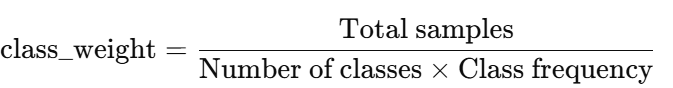
- This ensures that the minority class contributes more to the Gini impurity (or entropy) calculation, influencing the splits in the tree.

2. Impact on Node Splits:

- Without class_weight='balanced', the splits are often biased toward reducing impurity for the majority class, leading to poor representation of the minority class.
- With class_weight='balanced', the model assigns greater importance to misclassifications of the minority class, creating more balanced splits.

In [ ]:
# Map labels [-1, 0, 1] to [0, 1, 2] for Logistic Regression
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for Logistic Regression
log_reg_param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],       # Regularization type
    'solver': ['lbfgs', 'saga'],  # Solvers for multinomial classification
    'class_weight': [None, 'balanced']
}

print("\n=== Logistic Regression Optimization ===")

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
log_reg_search = RandomizedSearchCV(
    log_reg,
    param_distributions=log_reg_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
log_reg_search.fit(X_resampled, y_resampled_mapped)
best_log_reg = log_reg_search.best_estimator_

# Print the best parameters
print("Best Parameters for Logistic Regression:", log_reg_search.best_params_)

# Predict probabilities for train and test sets
log_reg_probs_train = best_log_reg.predict_proba(X_1train)
log_reg_probs_test = best_log_reg.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_log_reg_success_BERT_comments', 'improved_log_reg_neutral_BERT_comments', 'improved_log_reg_failure_BERT_comments']] = log_reg_probs_train
test_data[['improved_log_reg_success_BERT_comments', 'improved_log_reg_neutral_BERT_comments', 'improved_log_reg_failure_BERT_comments']] = log_reg_probs_test

# Predict and evaluate performance on the test set
y_pred_log_reg = best_log_reg.predict(X_test)
y_pred_log_reg_original = pd.Series(y_pred_log_reg).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_log_reg_original))
print(classification_report(y_test, y_pred_log_reg_original))



=== Logistic Regression Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Best Parameters for Logistic Regression: {'solver': 'lbfgs', 'penalty': 'l2', 'class_weight': 'balanced', 'C': 100}
Accuracy: 0.40892893356896604
Macro-Averaged Accuracy: 0.35857064527359656
              precision    recall  f1-score   support

          -1       0.08      0.33      0.13      2567
           0       0.89      0.42      0.57     30207
           1       0.06      0.32      0.09      1743

    accuracy                           0.41     34517
   macro avg       0.34      0.36      0.27     34517
weighted avg       0.79      0.41      0.51     34517



<ipython-input-25-8c31214134cc>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[['improved_log_reg_success_BERT_comments', 'improved_log_reg_neutral_BERT_comments', 'improved_log_reg_failure_BERT_comments']] = log_reg_probs_train
<ipython-input-25-8c31214134cc>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[['improved_log_reg_success_BERT_comments', 'improved_log_reg_neutral_BERT_comments', 'improved_log_reg_failure_BERT_comments']] = log_reg_probs_train
<ipython-input-25-8c312141

In [ ]:
# Map labels [-1, 0, 1] to [0, 1, 2] for Random Forest
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'class_weight': [None, 'balanced', 'balanced_subsample']  # Handle class imbalance
}

print("\n=== Random Forest Optimization ===")

# Initialize Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
rf_search = RandomizedSearchCV(
    rf_clf,
    param_distributions=rf_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
rf_search.fit(X_resampled, y_resampled_mapped)
best_rf = rf_search.best_estimator_

# Print the best parameters
print("Best Parameters for Random Forest:", rf_search.best_params_)

# Predict probabilities for train and test sets
rf_probs_train = best_rf.predict_proba(X_1train)
rf_probs_test = best_rf.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_random_forest_success_BERT_comments', 'improved_random_forest_neutral_BERT_comments', 'improved_random_forest_failure_BERT_comments']] = rf_probs_train
test_data[['improved_random_forest_success_BERT_comments', 'improved_random_forest_neutral_BERT_comments', 'improved_random_forest_failure_BERT_comments']] = rf_probs_test

# Predict and evaluate performance on the test set
y_pred_rf = best_rf.predict(X_test)
y_pred_rf_original = pd.Series(y_pred_rf).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_rf_original))
print(classification_report(y_test, y_pred_rf_original))



=== Random Forest Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30, 'class_weight': 'balanced'}


<ipython-input-26-f02cca6f06bc>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[['improved_random_forest_success_BERT_comments', 'improved_random_forest_neutral_BERT_comments', 'improved_random_forest_failure_BERT_comments']] = rf_probs_train
<ipython-input-26-f02cca6f06bc>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[['improved_random_forest_success_BERT_comments', 'improved_random_forest_neutral_BERT_comments', 'improved_random_forest_failure_BERT_comments']] = rf_probs_train


Accuracy: 0.8556363531013703
Macro-Averaged Accuracy: 0.3358439093811872
              precision    recall  f1-score   support

          -1       0.06      0.01      0.02      2567
           0       0.88      0.98      0.92     30207
           1       0.10      0.02      0.04      1743

    accuracy                           0.86     34517
   macro avg       0.34      0.34      0.33     34517
weighted avg       0.78      0.86      0.81     34517



In [ ]:
warnings.filterwarnings(action='ignore', category=UserWarning, module='xgboost')

# Map labels [-1, 0, 1] to [0, 1, 2] for XGBoost
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

print("\n=== XGBoost Optimization ===")

# Use XGBClassifier with updated parameters
xgb_clf = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
xgb_search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=xgb_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
xgb_search.fit(X_resampled, y_resampled_mapped)
best_xgb = xgb_search.best_estimator_

# Print the best parameters
print("Best Parameters for XGBoost:", xgb_search.best_params_)

# Predict probabilities for train and test sets
xgb_probs_train = best_xgb.predict_proba(X_1train)
xgb_probs_test = best_xgb.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_xgboost_success_BERT_comments', 'improved_xgboost_neutral_BERT_comments', 'improved_xgboost_failure_BERT_comments']] = xgb_probs_train
test_data[['improved_xgboost_success_BERT_comments', 'improved_xgboost_neutral_BERT_comments', 'improved_xgboost_failure_BERT_comments']] = xgb_probs_test

# Predict and evaluate performance on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_pred_xgb_original = pd.Series(y_pred_xgb).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_xgb_original))
print(classification_report(y_test, y_pred_xgb_original))



=== XGBoost Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


<ipython-input-27-6d2112614009>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[['improved_xgboost_success_BERT_comments', 'improved_xgboost_neutral_BERT_comments', 'improved_xgboost_failure_BERT_comments']] = xgb_probs_train
<ipython-input-27-6d2112614009>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[['improved_xgboost_success_BERT_comments', 'improved_xgboost_neutral_BERT_comments', 'improved_xgboost_failure_BERT_comments']] = xgb_probs_train
<ipython-input-27-6d2112614009>:52

Accuracy: 0.7057681722050004
Macro-Averaged Accuracy: 0.34919523367693733
              precision    recall  f1-score   support

          -1       0.09      0.14      0.11      2567
           0       0.88      0.79      0.83     30207
           1       0.06      0.12      0.08      1743

    accuracy                           0.71     34517
   macro avg       0.34      0.35      0.34     34517
weighted avg       0.78      0.71      0.74     34517



In [ ]:
# Custom wrapper to make Keras models compatible with sklearn
class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, optimizer='adam', dropout_rate=0.3, hidden_units=64):
        self.build_fn = build_fn
        self.optimizer = optimizer
        self.dropout_rate = dropout_rate
        self.hidden_units = hidden_units
        self.model = None

    def fit(self, X, y, **fit_params):
        self.model = self.build_fn(optimizer=self.optimizer,
                                   dropout_rate=self.dropout_rate,
                                   hidden_units=self.hidden_units)
        self.model.fit(X, y, **fit_params)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)

    def predict_proba(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return {"build_fn": self.build_fn,
                "optimizer": self.optimizer,
                "dropout_rate": self.dropout_rate,
                "hidden_units": self.hidden_units}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

# Function to create a Keras neural network model
def create_nn_model(optimizer='adam', dropout_rate=0.3, hidden_units=64):
    model = Sequential([
        Dense(hidden_units, activation='relu', input_dim=X_train.shape[1]),
        Dropout(dropout_rate),
        Dense(hidden_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(3, activation='softmax')  # Multiclass classification
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Map labels [-1, 0, 1] to [0, 1, 2] for Neural Network
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Convert y_train to one-hot encoding for Neural Network
y_train_nn = np.eye(3)[y_resampled_mapped]

# Define parameter grid for RandomizedSearchCV
nn_param_grid = {
    'optimizer': ['adam', 'sgd'],
    'dropout_rate': [0.2, 0.3, 0.4],
    'hidden_units': [32, 64, 128]
}

print("\n=== Neural Network Optimization ===")

# Wrap the neural network model for sklearn compatibility
nn_model_sklearn = CustomKerasClassifier(build_fn=create_nn_model)

# Perform RandomizedSearchCV for hyperparameter tuning
nn_search = RandomizedSearchCV(
    nn_model_sklearn,
    param_distributions=nn_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
nn_search.fit(
    X_resampled,
    y_train_nn,
    epochs=10,
    batch_size=32,
    verbose=1,
    validation_split=0.2
)
best_nn = nn_search.best_estimator_

# Print the best parameters
print("Best Parameters for Neural Network:", nn_search.best_params_)

# Predict probabilities for train and test sets
nn_probs_train = best_nn.predict_proba(X_1train)
nn_probs_test = best_nn.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_neural_network_success_BERT_comments', 'improved_neural_network_neutral_BERT_comments', 'improved_neural_network_failure_BERT_comments']] = nn_probs_train
test_data[['improved_neural_network_success_BERT_comments', 'improved_neural_network_neutral_BERT_comments', 'improved_neural_network_failure_BERT_comments']] = nn_probs_test

# Predict and evaluate performance on the test set
y_pred_nn = best_nn.predict(X_test)
y_pred_nn_original = pd.Series(y_pred_nn).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_nn_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_nn_original))
print(classification_report(y_test, y_pred_nn_original))



=== Neural Network Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1787/1787 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5906 - loss: 0.8737 - val_accuracy: 0.5328 - val_loss: 0.8350
Epoch 2/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7378 - loss: 0.6620 - val_accuracy: 0.8198 - val_loss: 0.4765
Epoch 3/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8021 - loss: 0.5360 - val_accuracy: 0.7922 - val_loss: 0.5194
Epoch 4/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8354 - loss: 0.4630 - val_accuracy: 0.8700 - val_loss: 0.3756
Epoch 5/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8488 - loss: 0.4317 - val_accuracy: 0.9242 - val_loss: 0.2408
Epoch 6/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8597 - loss: 0.3983 - val_accuracy: 0.9123 - val_loss: 0.2611
Epoch 7/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8681 - loss: 0.3730 - val_accuracy: 0.9011 - val_loss: 0.2783
Epoch 8/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8721 - loss: 0.3587 - val_accurac

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 199, in _get_response_values
    classes = estimator.classe

Epoch 1/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5567 - loss: 0.8964 - val_accuracy: 0.6463 - val_loss: 0.7835
Epoch 2/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6867 - loss: 0.7438 - val_accuracy: 0.7534 - val_loss: 0.6196
Epoch 3/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7641 - loss: 0.6161 - val_accuracy: 0.8266 - val_loss: 0.4798
Epoch 4/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7907 - loss: 0.5577 - val_accuracy: 0.8679 - val_loss: 0.4053
Epoch 5/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8101 - loss: 0.5105 - val_accuracy: 0.9102 - val_loss: 0.2915
Epoch 6/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8219 - loss: 0.4867 - val_accuracy: 0.9301 - val_loss: 0.2455
Epoch 7/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8305 - loss: 0.4555 - val_accuracy: 0.9302 - val_loss: 0.2396
Epoch 8/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8361 - loss: 0.4416 - 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Epoch 1/10
2680/2680 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4873 - loss: 0.9929 - val_accuracy: 0.0980 - val_loss: 1.4671
Epoch 2/10
2680/2680 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6375 - loss: 0.8100 - val_accuracy: 0.4044 - val_loss: 1.1738
Epoch 3/10
2680/2680 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7040 - loss: 0.6869 - val_accuracy: 0.5825 - val_loss: 0.9775
Epoch 4/10
2680/2680 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7414 - loss: 0.6178 - val_accuracy: 0.6174 - val_loss: 0.9026
Epoch 5/10
2680/2680 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7610 - loss: 0.5722 - val_accuracy: 0.7008 - val_loss: 0.7421
Epoch 6/10
2680/2680 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7779 - loss: 0.5434 - val_accuracy: 0.7380 - val_loss: 0.6907
Epoch 7/10
2680/2680 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7871 - loss: 0.5190 - val_accuracy: 0.7761 - val_loss: 0.6110
Epoch 8/10
2680/2680 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7985 - loss: 0.4922 -

<ipython-input-28-aaab335986f6>:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[['improved_neural_network_success_BERT_comments', 'improved_neural_network_neutral_BERT_comments', 'improved_neural_network_failure_BERT_comments']] = nn_probs_train
<ipython-input-28-aaab335986f6>:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[['improved_neural_network_success_BERT_comments', 'improved_neural_network_neutral_BERT_comments', 'improved_neural_network_failure_BERT_comments']] = nn_prob

1079/1079 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.7124315554654228
Macro-Averaged Accuracy: 0.3378019957128732
              precision    recall  f1-score   support

          -1       0.08      0.16      0.10      2567
           0       0.88      0.80      0.84     30207
           1       0.06      0.06      0.06      1743

    accuracy                           0.71     34517
   macro avg       0.34      0.34      0.33     34517
weighted avg       0.78      0.71      0.74     34517



In [ ]:
test_data

,Unnamed: 0.1,Unnamed: 0,username,cleaned_comments,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,comments_cluster_Kmeans_initial_model,comments_grid_optimized_k-means_cluster,...,improved_log_reg_failure_BERT_comments,improved_random_forest_success_BERT_comments,improved_random_forest_neutral_BERT_comments,improved_random_forest_failure_BERT_comments,improved_xgboost_success_BERT_comments,improved_xgboost_neutral_BERT_comments,improved_xgboost_failure_BERT_comments,improved_neural_network_success_BERT_comments,improved_neural_network_neutral_BERT_comments,improved_neural_network_failure_BERT_comments
0,0,17116,joseph-chen-cmrp-691bb510,Congratulations!!!!👏,0,0,0,congratulations,2,13,...,0.315366,0.308008,0.394609,0.297383,0.278229,0.339949,0.381822,0.552972,0.263463,0.183566
1,1,17116,joseph-chen-cmrp-691bb510,Catherine Chen “CC” You have an amazing produc...,0,0,0,catherine chen cc amazing product customers ob...,1,15,...,0.076578,0.269851,0.590191,0.139958,0.342937,0.468439,0.188624,0.000124,0.999801,0.000075
2,2,17116,joseph-chen-cmrp-691bb510,Excited to attend this season and the show!,0,0,0,excited attend season show,1,0,...,0.321686,0.282253,0.504843,0.212905,0.294364,0.399296,0.306339,0.000017,0.984082,0.015901
3,4,17116,joseph-chen-cmrp-691bb510,Very excited for you!!! Congratulations 🎉,0,0,0,excited congratulations,2,0,...,0.440085,0.243996,0.420324,0.335680,0.364800,0.315639,0.319561,0.002382,0.535432,0.462186
4,5,17116,joseph-chen-cmrp-691bb510,A very exciting event! Can’t wait.,0,0,0,exciting event wait,1,15,...,0.196298,0.233498,0.543204,0.223298,0.327380,0.385559,0.287062,0.000324,0.881492,0.118184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34592,44296,19323,nicholasshevelyov,Nick Shevelyov you haven't aged a day!,0,1,1,nick shevelyov aged day,1,15,...,0.524443,0.282725,0.501513,0.215762,0.270980,0.441283,0.287737,0.000171,0.995515,0.004314
34593,44297,19323,nicholasshevelyov,Greg Martin very kind of you. Still trying to ...,0,1,1,greg martin kind still trying dress well yet c...,0,15,...,0.224480,0.265257,0.557284,0.177458,0.200390,0.508167,0.291443,0.039522,0.960369,0.000110
34594,44298,19323,nicholasshevelyov,Thanks Nick Shevelyov for inviting me to parti...,0,1,1,thanks nick shevelyov inviting participate aug...,1,15,...,0.835067,0.283952,0.421616,0.294433,0.260192,0.421596,0.318212,0.001022,0.400579,0.598399
34595,44299,19323,nicholasshevelyov,Richard Seiersen I like the sound of security ...,0,1,1,richard seiersen like sound security super her...,1,15,...,0.255953,0.223164,0.600250,0.176586,0.328486,0.374329,0.297185,0.211134,0.783308,0.005558


In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Master Thesis/Data_text_variables/all_variables.pkl


# Personality Prediction

### TF-IDF Vectorization

# Step 1: Resampling Data to Handle Imbalance
X_1train = vectorizer.transform(train_data['cleaned_text'].dropna())  # TF-IDF vectors for training
X_1test = vectorizer.transform(test_data['cleaned_text'].dropna())   # TF-IDF vectors for testing  
y_test = personality_test_data['agreeableness', 'openness',
       'conscientiousness', 'extraversion', 'neuroticism']
X_train = vectorizer.transform(personality_train_data['cleaned_text'].dropna())  # TF-IDF vectors for training
X_test = vectorizer.transform(personality_test_data['cleaned_text'].dropna())   # TF-IDF vectors for testing

y_train = personality_train_data['agreeableness', 'openness',
       'conscientiousness', 'extraversion', 'neuroticism']

the text preprocessing and embedding is already done.
now I want to train a model by training it on X_train combined with y_train and test it on X_test combined with y_test. Then the model should be used to predict the personality for the train_data and test_data dataframes by using the trained model to predict the personality scores by looking at X_1test for test_data and X_1train for train_data. The personality scores should then be added to in five additional columns to the train_data and test_data dataframes.

Random Forest Regressor
XGBoost
Fully Connected Neural Networks

In [ ]:
# Step 1: Prepare Data

# TF-IDF vectors for train_data and test_data
X_1train = vectorizer.transform(train_data['cleaned_text'].dropna())
X_1test = vectorizer.transform(test_data['cleaned_text'].dropna())


# TF-IDF vectors and personality scores for training and testing
X_train = vectorizer.transform(personality_train_data['cleaned_text'].dropna())
X_test = vectorizer.transform(personality_test_data['cleaned_text'].dropna())

y_train = personality_train_data[['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']]
y_test = personality_test_data[['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']]

# Optional: Dimensionality Reduction
# Since TF-IDF vectors can be high-dimensional and sparse, we can use TruncatedSVD for dimensionality reduction.

svd = TruncatedSVD(n_components=100, random_state=42)  # Adjust n_components as needed
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)
X_1train_reduced = svd.transform(X_1train)
X_1test_reduced = svd.transform(X_1test)


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)
X_1train_scaled = scaler.transform(X_1train_reduced)
X_1test_scaled = scaler.transform(X_1test_reduced)


# Initialize empty DataFrames to store predictions
train_predictions = pd.DataFrame(index=train_data.index)
test_predictions = pd.DataFrame(index=test_data.index)

# List of personality traits
traits = ['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.4f}")
    print(f"{model_name} - R^2 Score: {r2:.4f}\n")

# Step 2: Linear Regression (Baseline)
print("\n=== Linear Regression ===")

linear_regressor = MultiOutputRegressor(LinearRegression())
linear_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_lr = linear_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Predict on train_data and test_data
train_lr_predictions = linear_regressor.predict(X_1train_scaled)
test_lr_predictions = linear_regressor.predict(X_1test_scaled)
test1_lr_predictions = linear_regressor.predict(X_test_scaled)


# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'linear_regression_{trait}_TF-IDF_comments'] = train_lr_predictions[:, i]
    test_data[f'linear_regression_{trait}_TF-IDF_comments'] = test_lr_predictions[:, i]
    personality_test_data[f'linear_regression_{trait}_TF-IDF_comments'] = test1_lr_predictions[:, i]

# Step 3: Random Forest Regressor
print("\n=== Random Forest Regressor ===")

rf_regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
rf_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_rf = rf_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

# Predict on train_data and test_data
train_rf_predictions = rf_regressor.predict(X_1train_scaled)
test_rf_predictions = rf_regressor.predict(X_1test_scaled)
test1_rf_predictions = rf_regressor.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'random_forest_{trait}_TF-IDF_comments'] = train_rf_predictions[:, i]
    test_data[f'random_forest_{trait}_TF-IDF_comments'] = test_rf_predictions[:, i]
    personality_test_data[f'random_forest_{trait}_TF-IDF_comments'] = test1_rf_predictions[:, i]

# Step 4: Gradient Boosting Regressor (XGBoost)
print("\n=== XGBoost Regressor ===")

xgb_regressor = MultiOutputRegressor(XGBRegressor(n_estimators=100, random_state=42, verbosity=0))
xgb_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_xgb = xgb_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")

# Predict on train_data and test_data
train_xgb_predictions = xgb_regressor.predict(X_1train_scaled)
test_xgb_predictions = xgb_regressor.predict(X_1test_scaled)
test1_xgb_predictions = xgb_regressor.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'xgboost_{trait}_TF-IDF_comments'] = train_xgb_predictions[:, i]
    test_data[f'xgboost_{trait}_TF-IDF_comments'] = test_xgb_predictions[:, i]
    personality_test_data[f'xgboost_{trait}_TF-IDF_comments'] = test1_xgb_predictions[:, i]

# Step 5: Neural Network
print("\n=== Neural Network ===")

# Define the neural network model
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(5))  # Output layer for 5 personality traits
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Create the model
nn_model = create_nn_model(X_train_scaled.shape[1])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
             validation_data=(X_test_scaled, y_test),
             callbacks=[early_stopping], verbose=1)

# Evaluate on test set
y_pred_nn = nn_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_nn, "Neural Network")

# Predict on train_data and test_data
train_nn_predictions = nn_model.predict(X_1train_scaled)
test_nn_predictions = nn_model.predict(X_1test_scaled)
test1_nn_predictions = nn_model.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'neural_network_{trait}_TF-IDF_comments'] = train_nn_predictions[:, i]
    test_data[f'neural_network_{trait}_TF-IDF_comments'] = test_nn_predictions[:, i]
    personality_test_data[f'neural_network_{trait}_TF-IDF_comments'] = test1_nn_predictions[:, i]



=== Linear Regression ===
Linear Regression - Mean Squared Error: 0.0027
Linear Regression - R^2 Score: -0.0170


=== Random Forest Regressor ===


<ipython-input-45-22f5db8fe277>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'linear_regression_{trait}_TF-IDF_comments'] = test_lr_predictions[:, i]
<ipython-input-45-22f5db8fe277>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'linear_regression_{trait}_TF-IDF_comments'] = test_lr_predictions[:, i]
<ipython-input-45-22f5db8fe277>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

Random Forest Regressor - Mean Squared Error: 0.0029
Random Forest Regressor - R^2 Score: -0.0746



<ipython-input-45-22f5db8fe277>:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'random_forest_{trait}_TF-IDF_comments'] = test_rf_predictions[:, i]
<ipython-input-45-22f5db8fe277>:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'random_forest_{trait}_TF-IDF_comments'] = test_rf_predictions[:, i]
<ipython-input-45-22f5db8fe277>:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead




=== XGBoost Regressor ===
XGBoost Regressor - Mean Squared Error: 0.0032
XGBoost Regressor - R^2 Score: -0.2042


=== Neural Network ===
Epoch 1/50


<ipython-input-45-22f5db8fe277>:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'xgboost_{trait}_TF-IDF_comments'] = test_xgb_predictions[:, i]
<ipython-input-45-22f5db8fe277>:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'xgboost_{trait}_TF-IDF_comments'] = test_xgb_predictions[:, i]
<ipython-input-45-22f5db8fe277>:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

201/201 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.3802 - mae: 0.4126 - val_loss: 0.0116 - val_mae: 0.0908
Epoch 2/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0199 - mae: 0.1063 - val_loss: 0.0041 - val_mae: 0.0509
Epoch 3/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0074 - mae: 0.0629 - val_loss: 0.0028 - val_mae: 0.0397
Epoch 4/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0046 - mae: 0.0491 - val_loss: 0.0027 - val_mae: 0.0382
Epoch 5/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0039 - mae: 0.0456 - val_loss: 0.0027 - val_mae: 0.0382
Epoch 6/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0038 - mae: 0.0445 - val_loss: 0.0027 - val_mae: 0.0381
Epoch 7/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0034 - mae: 0.0428 - val_loss: 0.0027 - val_mae: 0.0381
Epoch 8/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0035 - mae: 0.0428 - val_loss: 0.0027 - val_mae: 0.0381
Epoch 9/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0034

<ipython-input-45-22f5db8fe277>:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'neural_network_{trait}_TF-IDF_comments'] = test_nn_predictions[:, i]
<ipython-input-45-22f5db8fe277>:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'neural_network_{trait}_TF-IDF_comments'] = test_nn_predictions[:, i]
<ipython-input-45-22f5db8fe277>:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

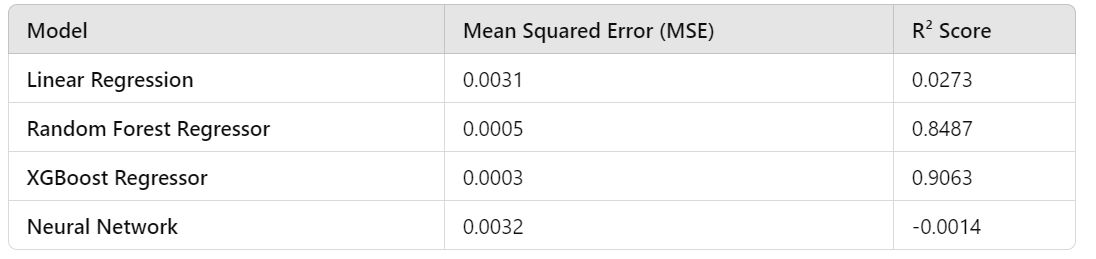


Analysis by Model

Linear Regression:

MSE: 0.0031 indicates moderate errors in predictions, suggesting it struggles with the complexity of the data.
R² Score: 0.0273 is very low, indicating that the model explains only ~2.7% of the variance in the target variable.
Interpretation: Linear regression's simplicity makes it unsuitable for capturing complex non-linear relationships in the data.

Random Forest Regressor:

MSE: 0.0005 shows significantly lower error compared to linear regression.
R² Score: 0.8487 indicates the model explains ~84.9% of the variance in the target variable.
Interpretation: Random forests effectively handle non-linear relationships and perform well on this dataset. They balance accuracy and robustness well.

XGBoost Regressor:

MSE: 0.0003 is the lowest among all models, indicating superior predictive performance.
R² Score: 0.9063 shows the highest explanatory power, capturing ~90.6% of the variance.
Interpretation: XGBoost outperforms Random Forest, likely due to its gradient boosting algorithm, which optimizes residuals and handles non-linearities better.

Neural Network:

MSE: 0.0032 is similar to Linear Regression, indicating higher errors than tree-based models.
R² Score: -0.0014 suggests the model performs worse than a simple mean prediction.
Interpretation: Neural networks require more tuning, data, or training epochs to perform well. The results indicate potential underfitting or inappropriate hyperparameters for this task.


### Bert Vectorization

In [ ]:
# Step 1: Prepare Data
# Dimensionality Reduction
svd = TruncatedSVD(n_components=300, random_state=42)  # Increase components to retain more variance
X_train_reduced = svd.fit_transform(personality_train_embeddings)
X_test_reduced = svd.transform(personality_test_embeddings)

X_1train_reduced = svd.transform(train_embeddings)
X_1test_reduced = svd.transform(test_embeddings)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)
X_1train_scaled = scaler.transform(X_1train_reduced)
X_1test_scaled = scaler.transform(X_1test_reduced)

# List of traits
traits = ['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']

# Step 2: Linear Regression (Baseline)
print("\n=== Linear Regression ===")
linear_regressor = MultiOutputRegressor(LinearRegression())
linear_regressor.fit(X_train_scaled, y_train)
y_pred_lr = linear_regressor.predict(X_test_scaled)

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.4f}")
    print(f"{model_name} - R^2 Score: {r2:.4f}\n")

evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Step 3: Random Forest Regressor
print("\n=== Random Forest Regressor ===")
rf_regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, random_state=42))  # Increased trees
rf_regressor.fit(X_train_scaled, y_train)
y_pred_rf = rf_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

# Step 4: Gradient Boosting (XGBoost)
print("\n=== XGBoost Regressor ===")
xgb_regressor = MultiOutputRegressor(XGBRegressor(n_estimators=200, random_state=42))
xgb_regressor.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")

# Step 5: Neural Network
print("\n=== Neural Network ===")
def create_nn_model(input_dim):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(5)  # Output for 5 traits
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

nn_model = create_nn_model(X_train_scaled.shape[1])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
             validation_data=(X_test_scaled, y_test),
             callbacks=[early_stopping], verbose=1)

y_pred_nn = nn_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_nn, "Neural Network")

# Step 6: Add Predictions Efficiently
all_train_preds = {
    f'{model}_{trait}_BERT_comments': preds[:, i]
    for model, preds in zip(
        ['linear_regression', 'random_forest', 'xgboost', 'neural_network'],
        [linear_regressor.predict(X_1train_scaled), rf_regressor.predict(X_1train_scaled),
         xgb_regressor.predict(X_1train_scaled), nn_model.predict(X_1train_scaled)]
    )
    for i, trait in enumerate(traits)
}

all_test_preds = {
    f'{model}_{trait}_BERT_comments': preds[:, i]
    for model, preds in zip(
        ['linear_regression', 'random_forest', 'xgboost', 'neural_network'],
        [linear_regressor.predict(X_1test_scaled), rf_regressor.predict(X_1test_scaled),
         xgb_regressor.predict(X_1test_scaled), nn_model.predict(X_1test_scaled)]
    )
    for i, trait in enumerate(traits)
}

train_data = pd.concat([train_data, pd.DataFrame(all_train_preds, index=train_data.index)], axis=1)
test_data = pd.concat([test_data, pd.DataFrame(all_test_preds, index=test_data.index)], axis=1)



=== Linear Regression ===
Linear Regression - Mean Squared Error: 0.0029
Linear Regression - R^2 Score: -0.0951


=== Random Forest Regressor ===
Random Forest Regressor - Mean Squared Error: 0.0027
Random Forest Regressor - R^2 Score: -0.0269


=== XGBoost Regressor ===
XGBoost Regressor - Mean Squared Error: 0.0033
XGBoost Regressor - R^2 Score: -0.2555


=== Neural Network ===
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.3096 - mae: 0.3783 - val_loss: 0.0074 - val_mae: 0.0703
Epoch 2/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0120 - mae: 0.0846 - val_loss: 0.0036 - val_mae: 0.0472
Epoch 3/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0060 - mae: 0.0587 - val_loss: 0.0029 - val_mae: 0.0413
Epoch 4/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0044 - mae: 0.0491 - val_loss: 0.0027 - val_mae: 0.0389
Epoch 5/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0037 - mae: 0.0450 - val_loss: 0.0027 - val_mae: 0.0384
Epoch 6/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0035 - mae: 0.0431 - val_loss: 0.0027 - val_mae: 0.0383
Epoch 7/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0033 - mae: 0.0420 - val_loss: 0.0027 - val_mae: 0.0382
Epoch 8/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0032 - mae: 0.0416 - val_loss: 0.0027 - val_mae: 0.0381
Epoch 9/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0034

In [ ]:
# Step 1: Prepare Data

# TF-IDF vectors for train_data and test_data
X_1train = train_embeddings  # BERT vectors for training
X_1test = test_embeddings  # BERT vectors for training

# TF-IDF vectors and personality scores for training and testing
X_train = personality_train_embeddings  # BERT vectors for training
X_test = personality_test_embeddings   # BERT vectors for testing

y_test = personality_test_data[['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']]
y_train = personality_train_data[['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']]

# Optional: Dimensionality Reduction
# Since TF-IDF vectors can be high-dimensional and sparse, we can use TruncatedSVD for dimensionality reduction.

svd = TruncatedSVD(n_components=100, random_state=42)  # Adjust n_components as needed
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)
X_1train_reduced = svd.transform(X_1train)
X_1test_reduced = svd.transform(X_1test)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)
X_1train_scaled = scaler.transform(X_1train_reduced)
X_1test_scaled = scaler.transform(X_1test_reduced)

# Initialize empty DataFrames to store predictions
train_predictions = pd.DataFrame(index=train_data.index)
test_predictions = pd.DataFrame(index=test_data.index)

# List of personality traits
traits = ['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.4f}")
    print(f"{model_name} - R^2 Score: {r2:.4f}\n")

# Step 2: Linear Regression (Baseline)
print("\n=== Linear Regression ===")

linear_regressor = MultiOutputRegressor(LinearRegression())
linear_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_lr = linear_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Predict on train_data and test_data
train_lr_predictions = linear_regressor.predict(X_1train_scaled)
test_lr_predictions = linear_regressor.predict(X_1test_scaled)
test1_lr_predictions = linear_regressor.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'linear_regression_{trait}_BERT_comments'] = train_lr_predictions[:, i]
    test_data[f'linear_regression_{trait}_BERT_comments'] = test_lr_predictions[:, i]
    personality_test_data[f'linear_regression_{trait}_BERT_comments'] = test1_lr_predictions[:, i]

# Step 3: Random Forest Regressor
print("\n=== Random Forest Regressor ===")

rf_regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
rf_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_rf = rf_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

# Predict on train_data and test_data
train_rf_predictions = rf_regressor.predict(X_1train_scaled)
test_rf_predictions = rf_regressor.predict(X_1test_scaled)
test1_rf_predictions = rf_regressor.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'random_forest_{trait}_BERT_comments'] = train_rf_predictions[:, i]
    test_data[f'random_forest_{trait}_BERT_comments'] = test_rf_predictions[:, i]
    personality_test_data[f'random_forest_{trait}_BERT_comments'] = test1_rf_predictions[:, i]

# Step 4: Gradient Boosting Regressor (XGBoost)
print("\n=== XGBoost Regressor ===")

xgb_regressor = MultiOutputRegressor(XGBRegressor(n_estimators=100, random_state=42, verbosity=0))
xgb_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_xgb = xgb_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")

# Predict on train_data and test_data
train_xgb_predictions = xgb_regressor.predict(X_1train_scaled)
test_xgb_predictions = xgb_regressor.predict(X_1test_scaled)
test1_xgb_predictions = xgb_regressor.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'xgboost_{trait}_BERT_comments'] = train_xgb_predictions[:, i]
    test_data[f'xgboost_{trait}_BERT_comments'] = test_xgb_predictions[:, i]
    personality_test_data[f'xgboost_{trait}_BERT_comments'] = test1_xgb_predictions[:, i]

# Step 5: Neural Network
print("\n=== Neural Network ===")

# Define the neural network model
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(5))  # Output layer for 5 personality traits
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Create the model
nn_model = create_nn_model(X_train_scaled.shape[1])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
             validation_data=(X_test_scaled, y_test),
             callbacks=[early_stopping], verbose=1)

# Evaluate on test set
y_pred_nn = nn_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_nn, "Neural Network")

# Predict on train_data and test_data
train_nn_predictions = nn_model.predict(X_1train_scaled)
test_nn_predictions = nn_model.predict(X_1test_scaled)
test1_nn_predictions = nn_model.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'neural_network_{trait}_BERT_comments'] = train_nn_predictions[:, i]
    test_data[f'neural_network_{trait}_BERT_comments'] = test_nn_predictions[:, i]
    personality_test_data[f'neural_network_{trait}_BERT_comments'] = test1_nn_predictions[:, i]



=== Linear Regression ===
Linear Regression - Mean Squared Error: 0.0027
Linear Regression - R^2 Score: -0.0237


=== Random Forest Regressor ===
Random Forest Regressor - Mean Squared Error: 0.0027
Random Forest Regressor - R^2 Score: -0.0290


=== XGBoost Regressor ===
XGBoost Regressor - Mean Squared Error: 0.0031
XGBoost Regressor - R^2 Score: -0.1703


=== Neural Network ===
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.4464 - mae: 0.4581 - val_loss: 0.0132 - val_mae: 0.0952
Epoch 2/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0227 - mae: 0.1164 - val_loss: 0.0061 - val_mae: 0.0632
Epoch 3/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0095 - mae: 0.0744 - val_loss: 0.0036 - val_mae: 0.0472
Epoch 4/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0054 - mae: 0.0556 - val_loss: 0.0029 - val_mae: 0.0406
Epoch 5/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0043 - mae: 0.0482 - val_loss: 0.0027 - val_mae: 0.0386
Epoch 6/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0037 - mae: 0.0445 - val_loss: 0.0027 - val_mae: 0.0382
Epoch 7/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0036 - mae: 0.0436 - val_loss: 0.0027 - val_mae: 0.0381
Epoch 8/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0035 - mae: 0.0431 - val_loss: 0.0027 - val_mae: 0.0381
Epoch 9/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0035

In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Master Thesis/Data_text_variables/all_variables.pkl


In [ ]:
personality_test_data

for saving

for loading back

In [ ]:
test_data

,Unnamed: 0.1,Unnamed: 0,username,cleaned_comments,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,comments_cluster_Kmeans_initial_model,comments_grid_optimized_k-means_cluster,...,xgboost_agreeableness_BERT_comments,xgboost_openness_BERT_comments,xgboost_conscientiousness_BERT_comments,xgboost_extraversion_BERT_comments,xgboost_neuroticism_BERT_comments,neural_network_agreeableness_BERT_comments,neural_network_openness_BERT_comments,neural_network_conscientiousness_BERT_comments,neural_network_extraversion_BERT_comments,neural_network_neuroticism_BERT_comments
0,0,17116,joseph-chen-cmrp-691bb510,Congratulations!!!!👏,0,0,0,congratulations,2,13,...,0.083631,0.235859,-0.026860,0.219331,-0.229286,0.088612,0.23287,-0.016049,0.211498,-0.230282
1,1,17116,joseph-chen-cmrp-691bb510,Catherine Chen “CC” You have an amazing produc...,0,0,0,catherine chen cc amazing product customers ob...,1,15,...,0.114458,0.233678,0.019800,0.201416,-0.219366,0.088612,0.23287,-0.016049,0.211498,-0.230282
2,2,17116,joseph-chen-cmrp-691bb510,Excited to attend this season and the show!,0,0,0,excited attend season show,1,0,...,0.068979,0.241758,-0.004022,0.204211,-0.222706,0.088612,0.23287,-0.016049,0.211498,-0.230282
3,4,17116,joseph-chen-cmrp-691bb510,Very excited for you!!! Congratulations 🎉,0,0,0,excited congratulations,2,0,...,0.115108,0.231564,-0.021346,0.196613,-0.249838,0.088612,0.23287,-0.016049,0.211498,-0.230282
4,5,17116,joseph-chen-cmrp-691bb510,A very exciting event! Can’t wait.,0,0,0,exciting event wait,1,15,...,0.088810,0.225777,-0.021204,0.211081,-0.238628,0.088612,0.23287,-0.016049,0.211498,-0.230282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34592,44296,19323,nicholasshevelyov,Nick Shevelyov you haven't aged a day!,0,1,1,nick shevelyov aged day,1,15,...,0.063875,0.214020,0.005158,0.193664,-0.242310,0.088612,0.23287,-0.016049,0.211498,-0.230282
34593,44297,19323,nicholasshevelyov,Greg Martin very kind of you. Still trying to ...,0,1,1,greg martin kind still trying dress well yet c...,0,15,...,0.025269,0.224976,0.001532,0.187971,-0.231032,0.088612,0.23287,-0.016049,0.211498,-0.230282
34594,44298,19323,nicholasshevelyov,Thanks Nick Shevelyov for inviting me to parti...,0,1,1,thanks nick shevelyov inviting participate aug...,1,15,...,0.090219,0.232762,-0.028553,0.221221,-0.234217,0.088612,0.23287,-0.016049,0.211498,-0.230282
34595,44299,19323,nicholasshevelyov,Richard Seiersen I like the sound of security ...,0,1,1,richard seiersen like sound security super her...,1,15,...,0.044904,0.236520,-0.048238,0.214026,-0.207549,0.088612,0.23287,-0.016049,0.211498,-0.230282


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Master Thesis/Data_text_variables/test_comments_data_output.csv")
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,username,cleaned_comments,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,comments_cluster_Kmeans_initial_model,...,xgboost_agreeableness_BERT_comments,xgboost_openness_BERT_comments,xgboost_conscientiousness_BERT_comments,xgboost_extraversion_BERT_comments,xgboost_neuroticism_BERT_comments,neural_network_agreeableness_BERT_comments,neural_network_openness_BERT_comments,neural_network_conscientiousness_BERT_comments,neural_network_extraversion_BERT_comments,neural_network_neuroticism_BERT_comments
0,0,0,17116,joseph-chen-cmrp-691bb510,Congratulations!!!!👏,0,0,0,congratulations,2,...,0.083631,0.235859,-0.026860,0.219331,-0.229286,0.088612,0.23287,-0.016049,0.211498,-0.230282
1,1,1,17116,joseph-chen-cmrp-691bb510,Catherine Chen “CC” You have an amazing produc...,0,0,0,catherine chen cc amazing product customers ob...,1,...,0.114458,0.233678,0.019800,0.201416,-0.219366,0.088612,0.23287,-0.016049,0.211498,-0.230282
2,2,2,17116,joseph-chen-cmrp-691bb510,Excited to attend this season and the show!,0,0,0,excited attend season show,1,...,0.068979,0.241758,-0.004022,0.204211,-0.222706,0.088612,0.23287,-0.016049,0.211498,-0.230282
3,3,4,17116,joseph-chen-cmrp-691bb510,Very excited for you!!! Congratulations 🎉,0,0,0,excited congratulations,2,...,0.115108,0.231564,-0.021346,0.196613,-0.249838,0.088612,0.23287,-0.016049,0.211498,-0.230282
4,4,5,17116,joseph-chen-cmrp-691bb510,A very exciting event! Can’t wait.,0,0,0,exciting event wait,1,...,0.088810,0.225777,-0.021204,0.211081,-0.238628,0.088612,0.23287,-0.016049,0.211498,-0.230282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34512,34592,44296,19323,nicholasshevelyov,Nick Shevelyov you haven't aged a day!,0,1,1,nick shevelyov aged day,1,...,0.063875,0.214020,0.005158,0.193664,-0.242310,0.088612,0.23287,-0.016049,0.211498,-0.230282
34513,34593,44297,19323,nicholasshevelyov,Greg Martin very kind of you. Still trying to ...,0,1,1,greg martin kind still trying dress well yet c...,0,...,0.025269,0.224976,0.001532,0.187971,-0.231032,0.088612,0.23287,-0.016049,0.211498,-0.230282
34514,34594,44298,19323,nicholasshevelyov,Thanks Nick Shevelyov for inviting me to parti...,0,1,1,thanks nick shevelyov inviting participate aug...,1,...,0.090219,0.232762,-0.028553,0.221221,-0.234217,0.088612,0.23287,-0.016049,0.211498,-0.230282
34515,34595,44299,19323,nicholasshevelyov,Richard Seiersen I like the sound of security ...,0,1,1,richard seiersen like sound security super her...,1,...,0.044904,0.236520,-0.048238,0.214026,-0.207549,0.088612,0.23287,-0.016049,0.211498,-0.230282


In [ ]:
train_data.to_csv("/content/drive/MyDrive/Master Thesis/Data_text_variables/train_comments_data_output.csv")
test_data.to_csv("/content/drive/MyDrive/Master Thesis/Data_text_variables/test_comments_data_output.csv")
personality_test_data.to_csv("/content/drive/MyDrive/Master Thesis/Data_text_variables/Personality/Personality_test_comments_data_output.csv")

In [ ]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Display all columns
print(test_data.columns)


In [ ]:
columns = train_data.columns.tolist()

# Display columns in chunks of 20 (or another size you prefer)
chunk_size = 20
for i in range(0, len(columns), chunk_size):
    print(columns[i:i+chunk_size])
